scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.25.2 scipy==1.11.4 pandas==2.0.3 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


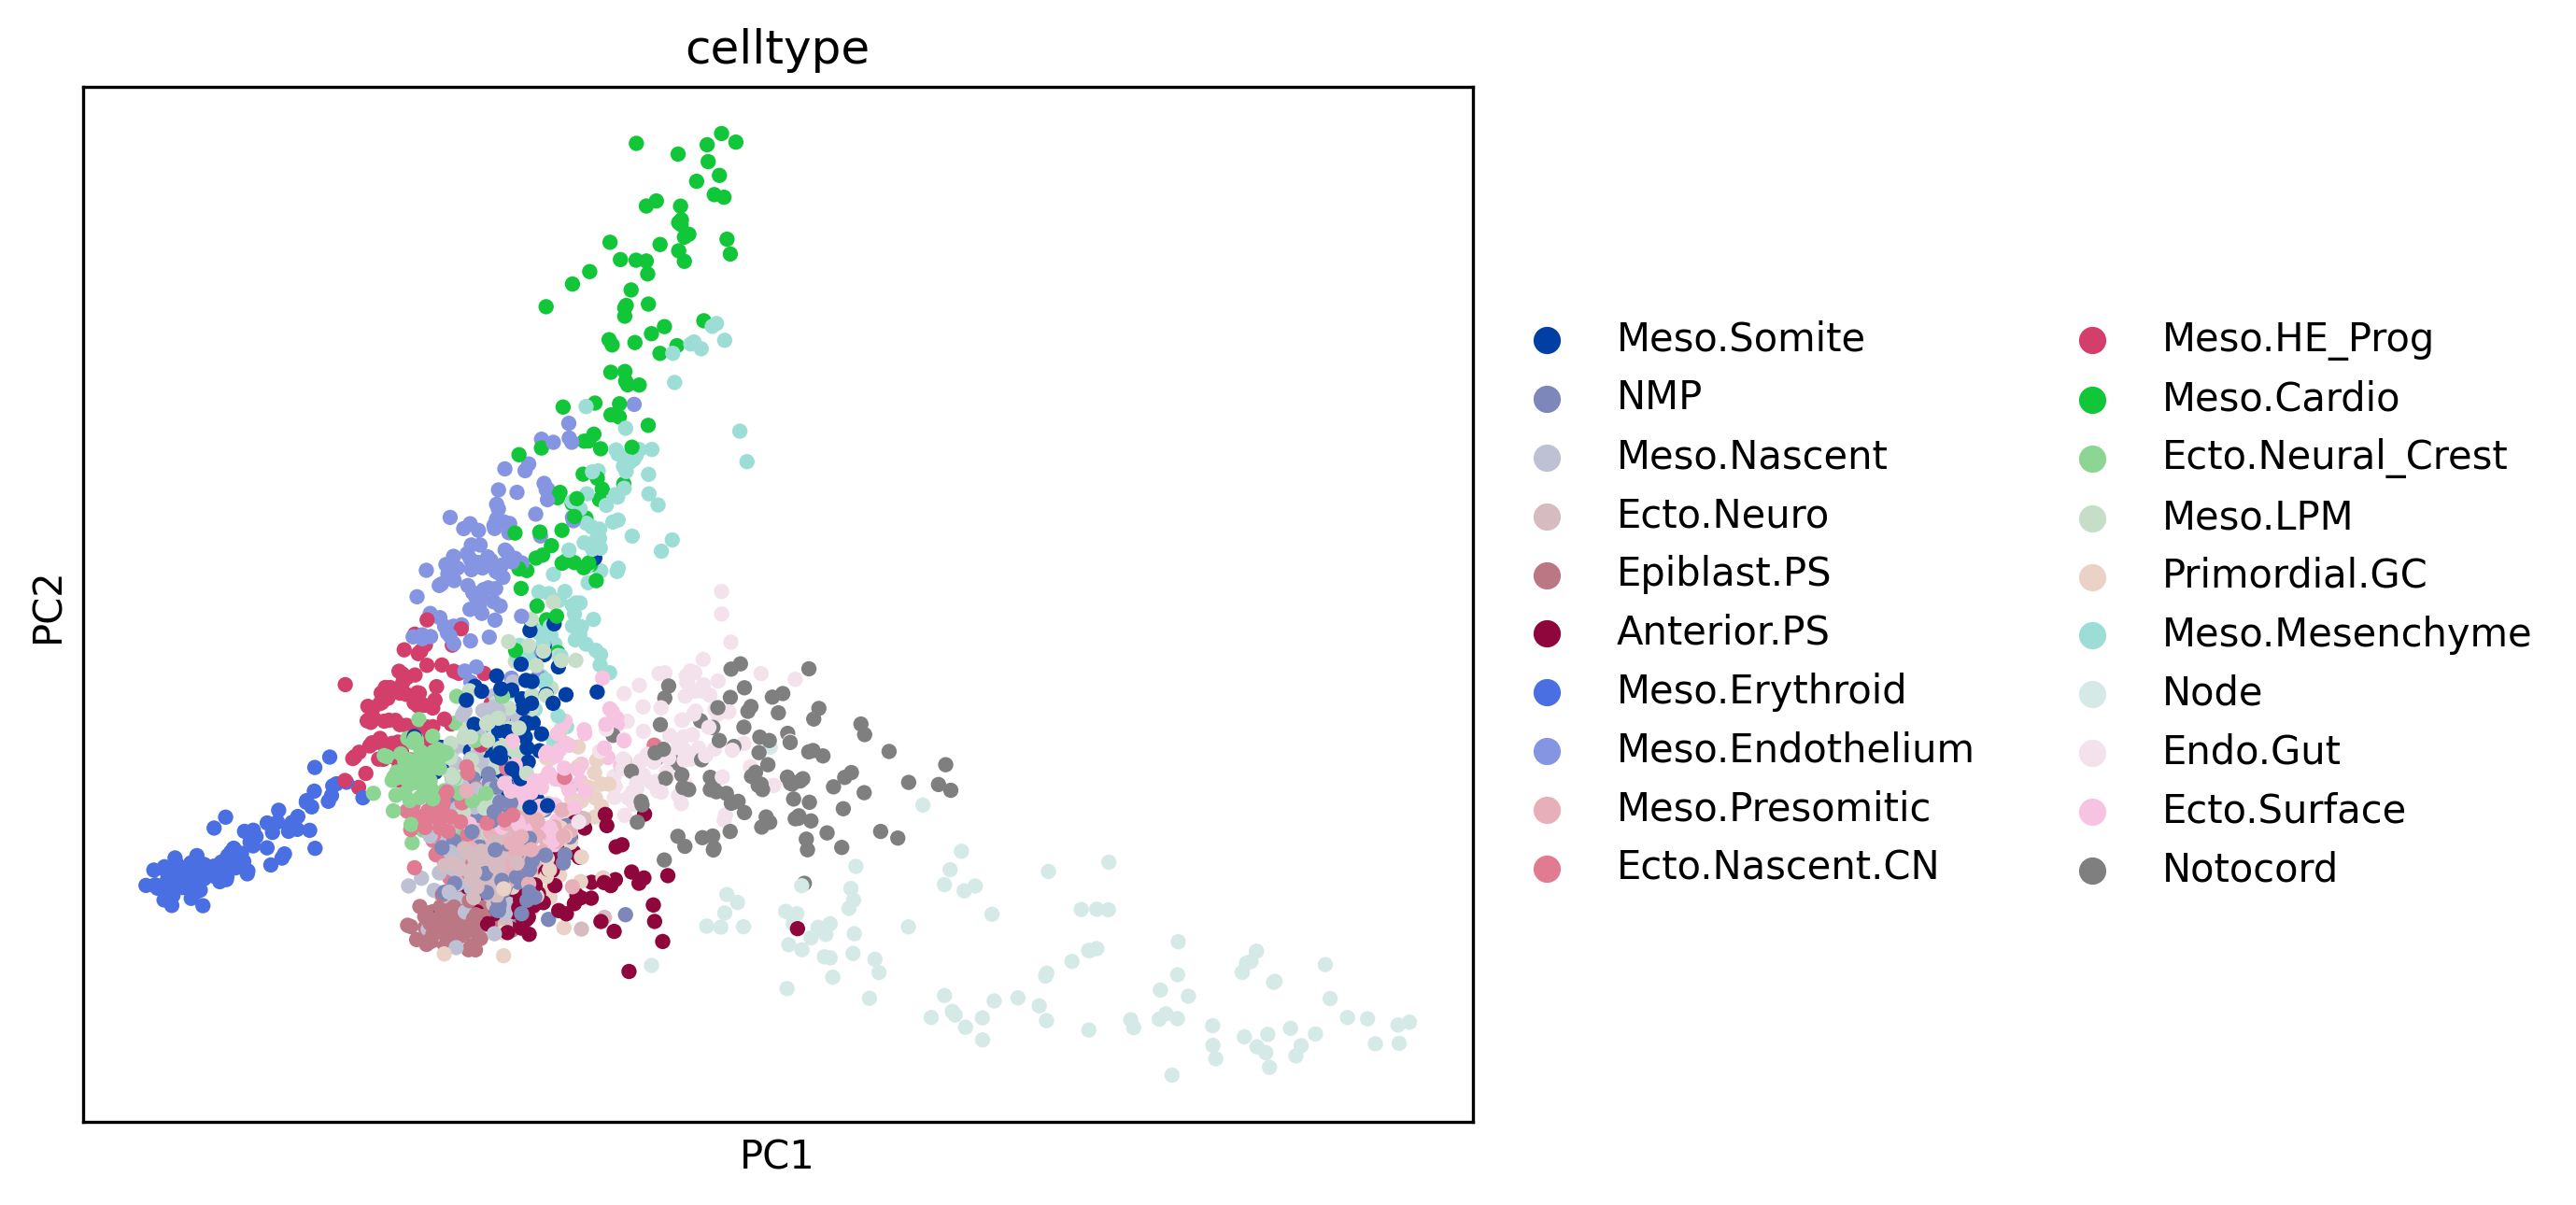

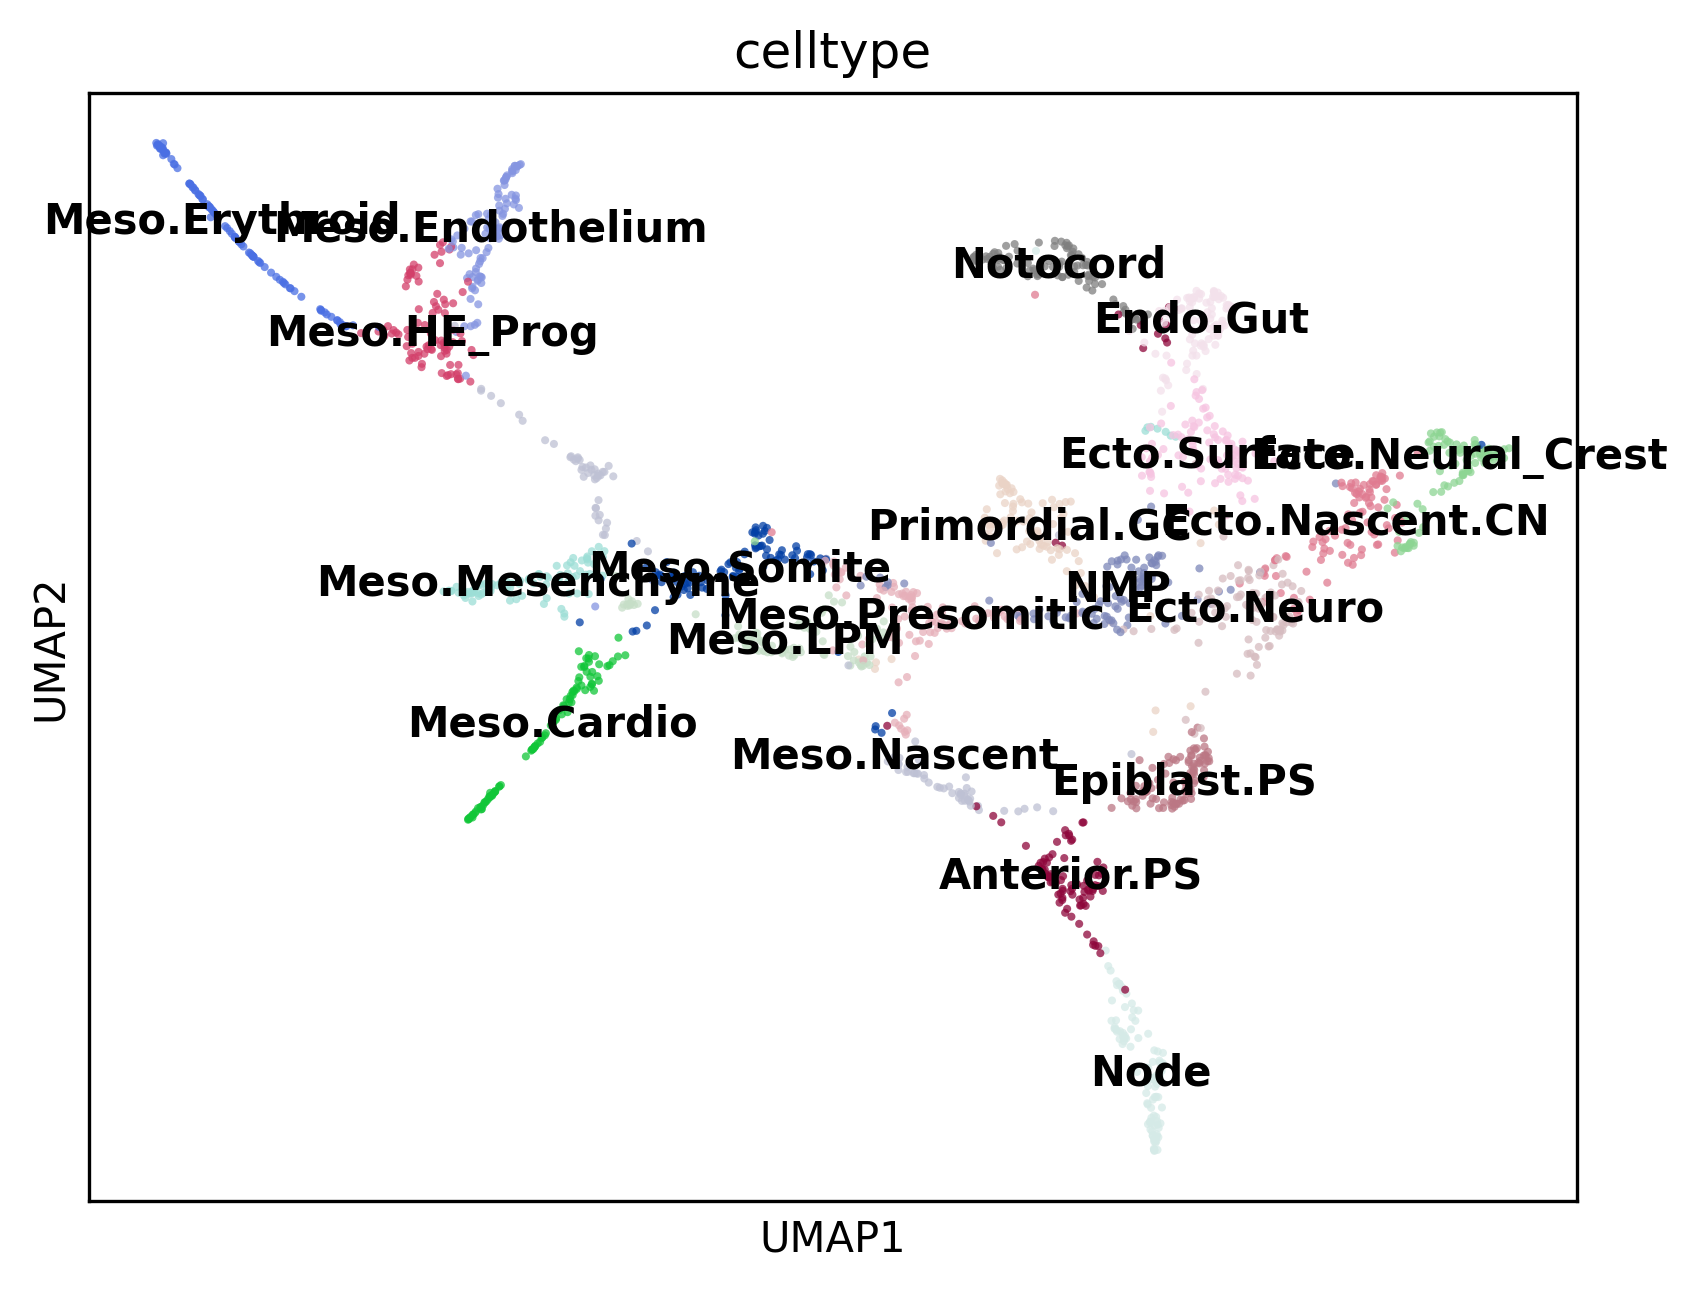

In [ ]:
!pip install --quiet scanpy scipy umap-learn leidenalg
!pip install --quiet -U scikit-learn

import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300
sc.logging.print_header()

adTI = sc.read_h5ad("adEarly_CSCB24.h5ad")

adTI.var['mt'] = adTI.var_names.str.startswith('MT-')
ribo_prefix = ("RPS","RPL")
adTI.var['ribo'] = adTI.var_names.str.startswith(ribo_prefix)
sc.pp.calculate_qc_metrics(adTI, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)

adClean = adTI.copy()
adClean = adClean[adClean.obs['pct_counts_mt']<20,:].copy()

sc.pp.filter_cells(adClean, min_genes=500)
sc.pp.filter_cells(adClean, max_counts=30000)
sc.pp.filter_genes(adClean, min_cells=3)

adNorm = adClean.copy()

sc.pp.normalize_total(adNorm, target_sum=1e4)
sc.pp.log1p(adNorm)
sc.pp.highly_variable_genes(adNorm, min_mean=0.0125, max_mean=6, min_disp=0.25)
sc.tl.pca(adNorm, use_highly_variable=True)
sc.pl.pca(adNorm, color='celltype')

n_neighbors = 20
n_pcs = 10
sc.pp.neighbors(adNorm, n_neighbors=n_neighbors, n_pcs=n_pcs)
sc.tl.leiden(adNorm,.1)
sc.tl.paga(adNorm)
sc.pl.paga(adNorm, plot=False)
sc.tl.umap(adNorm, 0.25, init_pos='paga')
sc.pl.umap(adNorm,color=['celltype'], alpha=.75, s=15, legend_loc='on data')

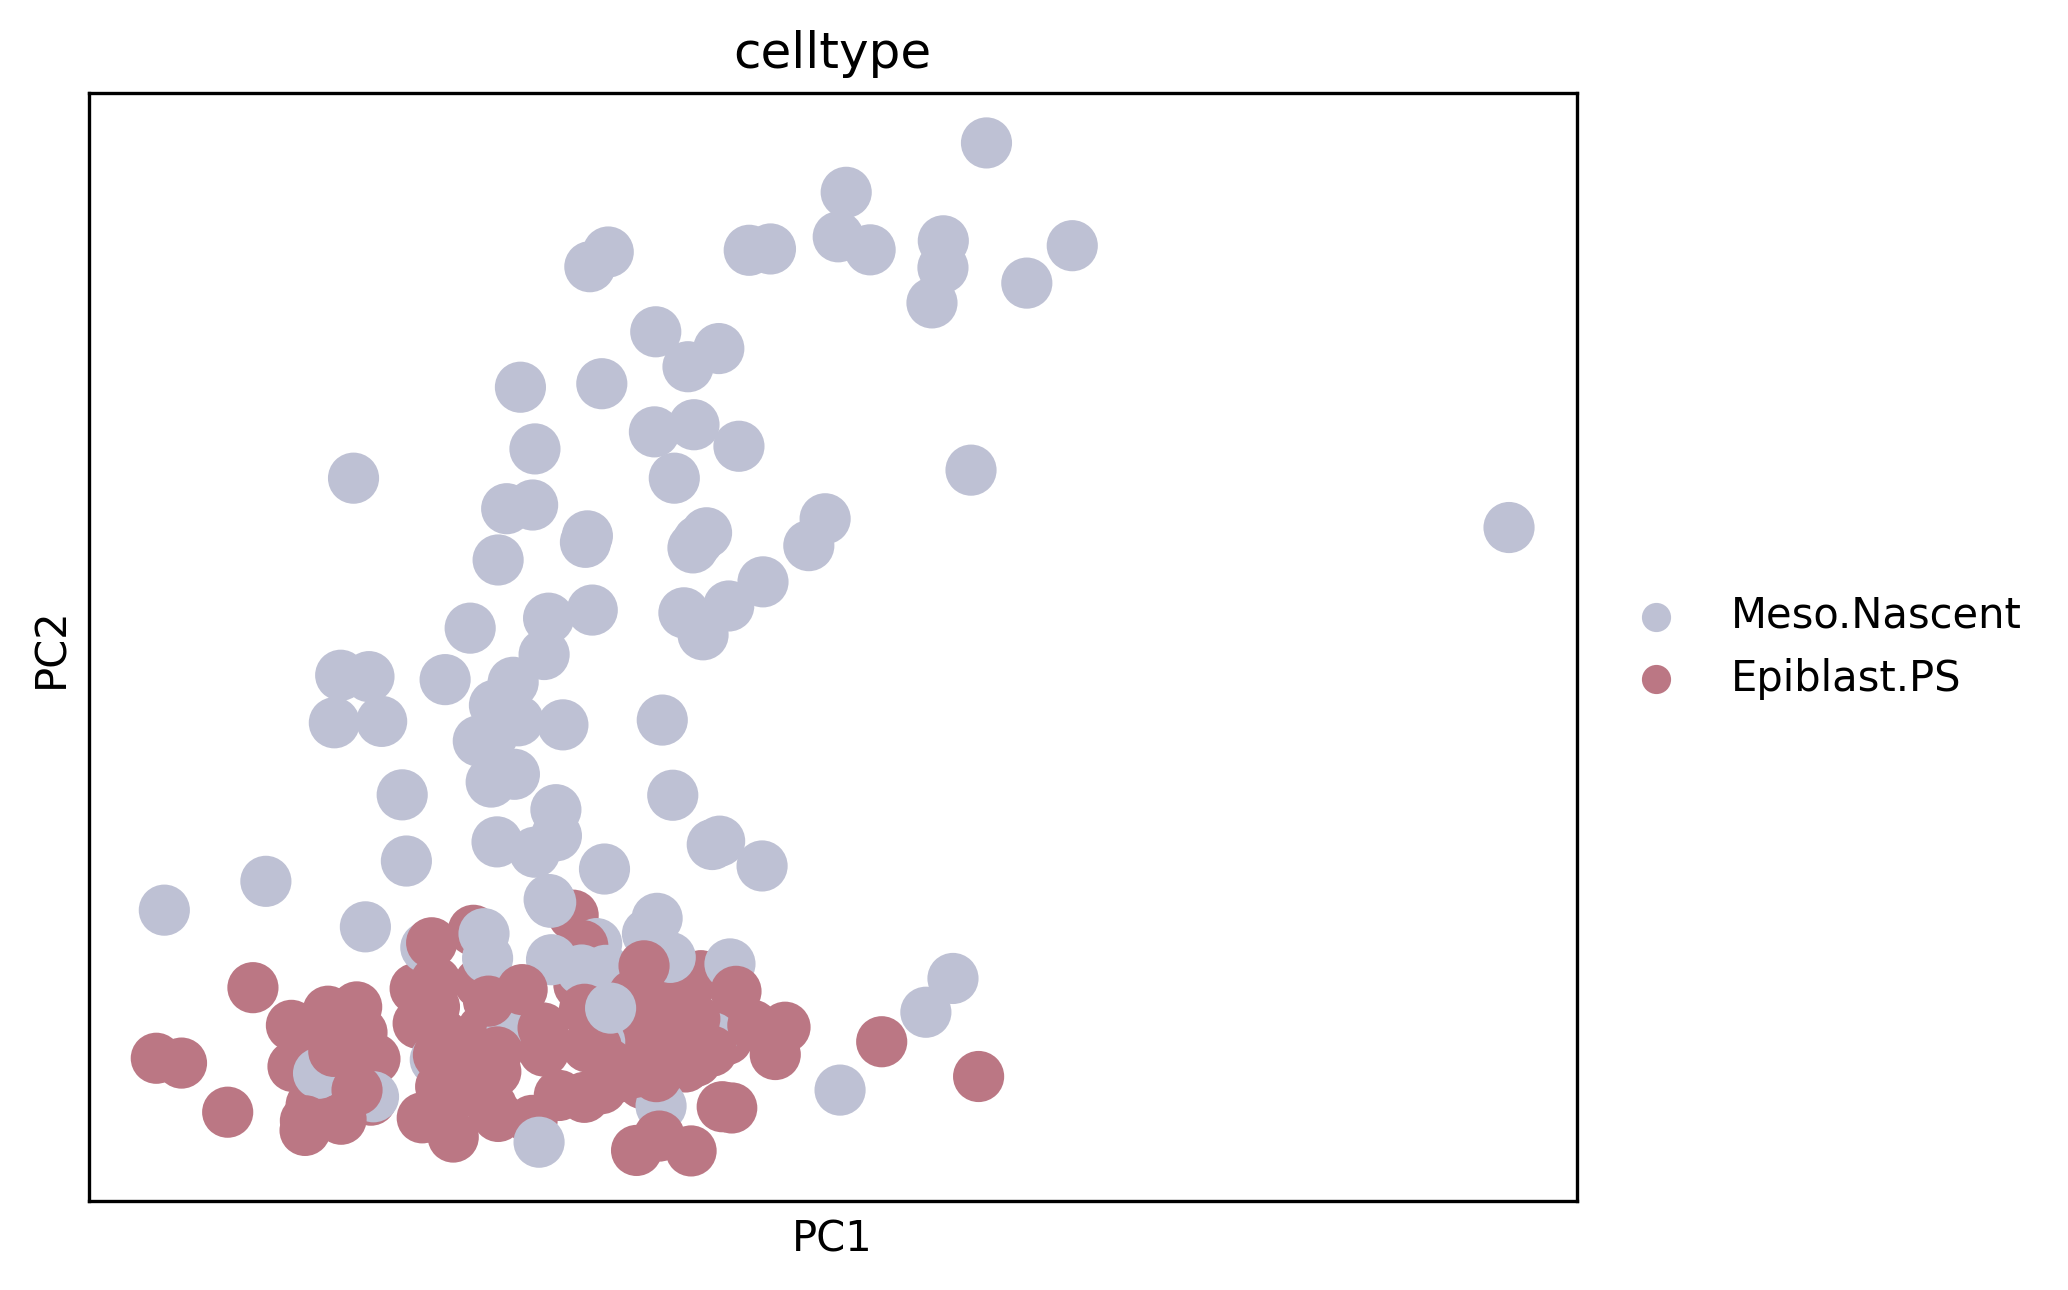

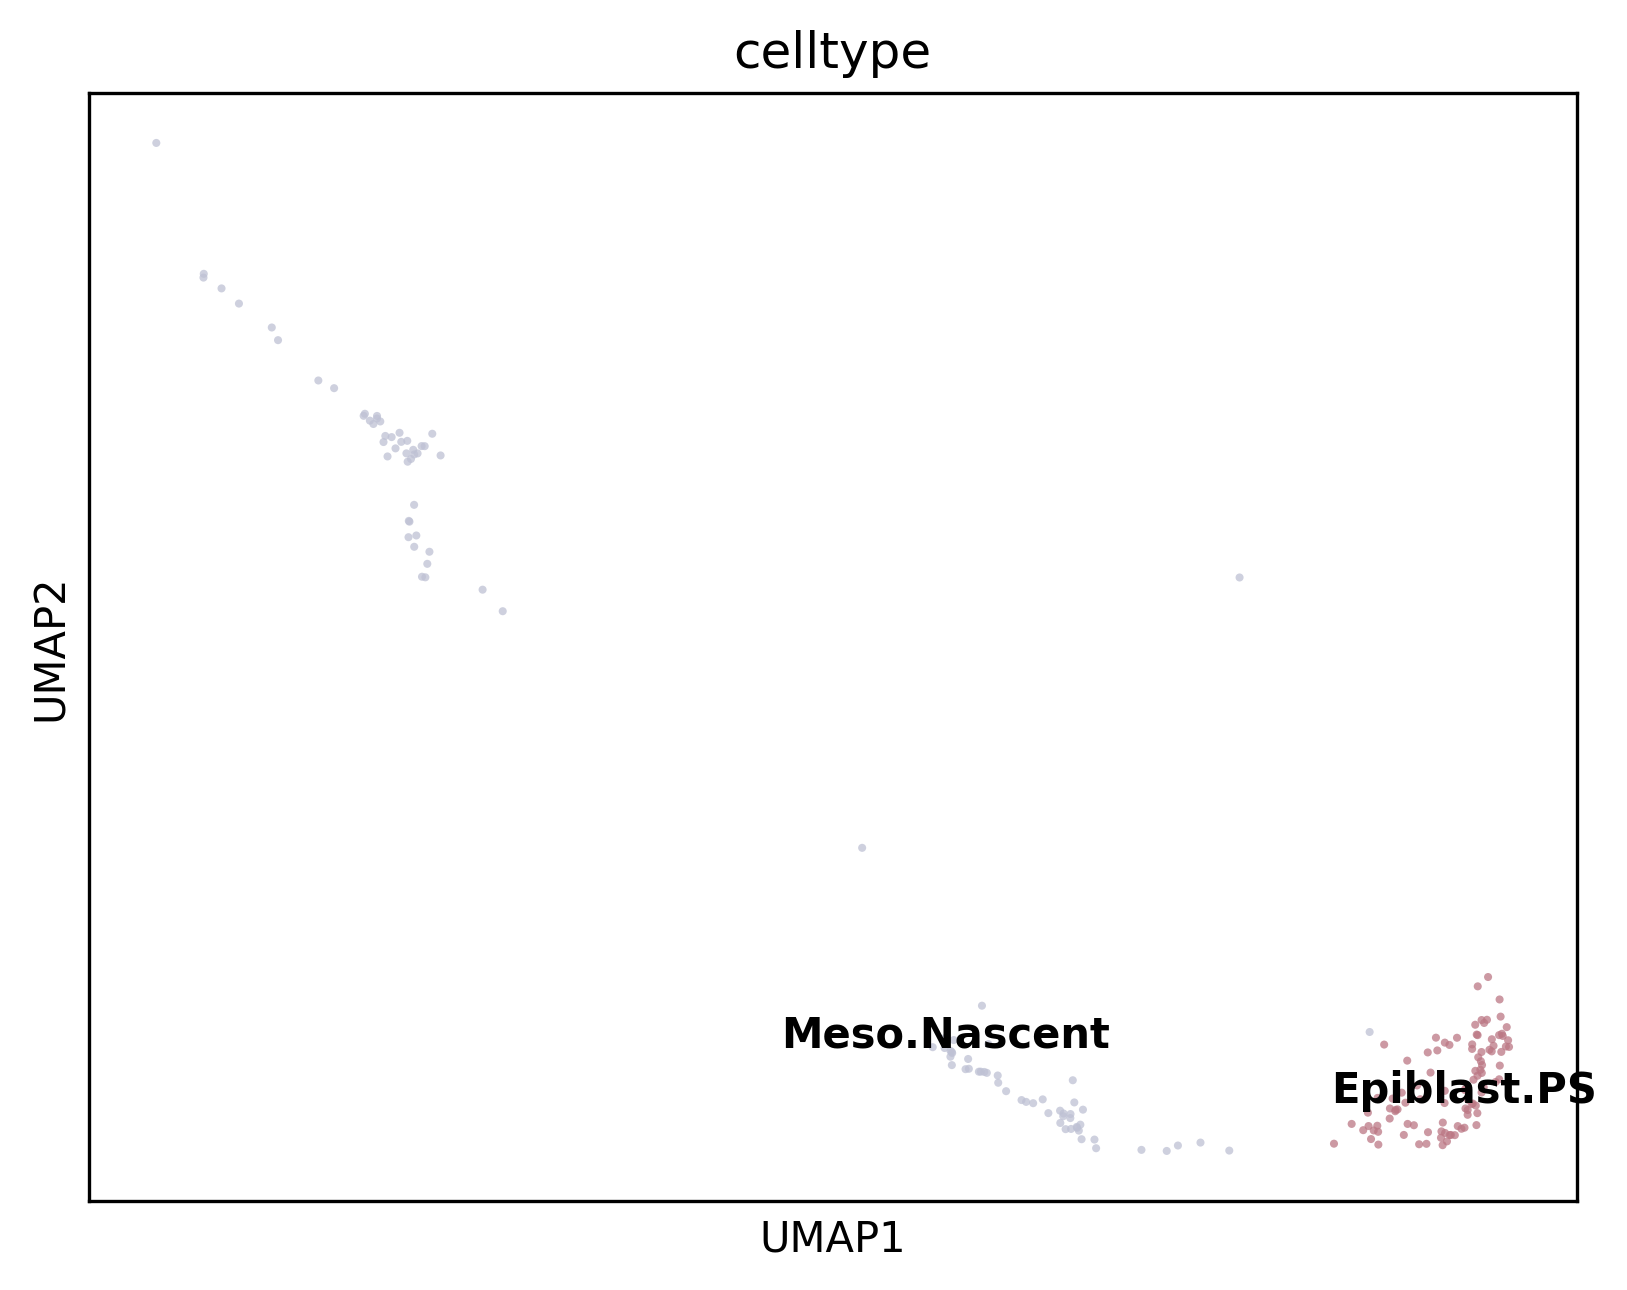

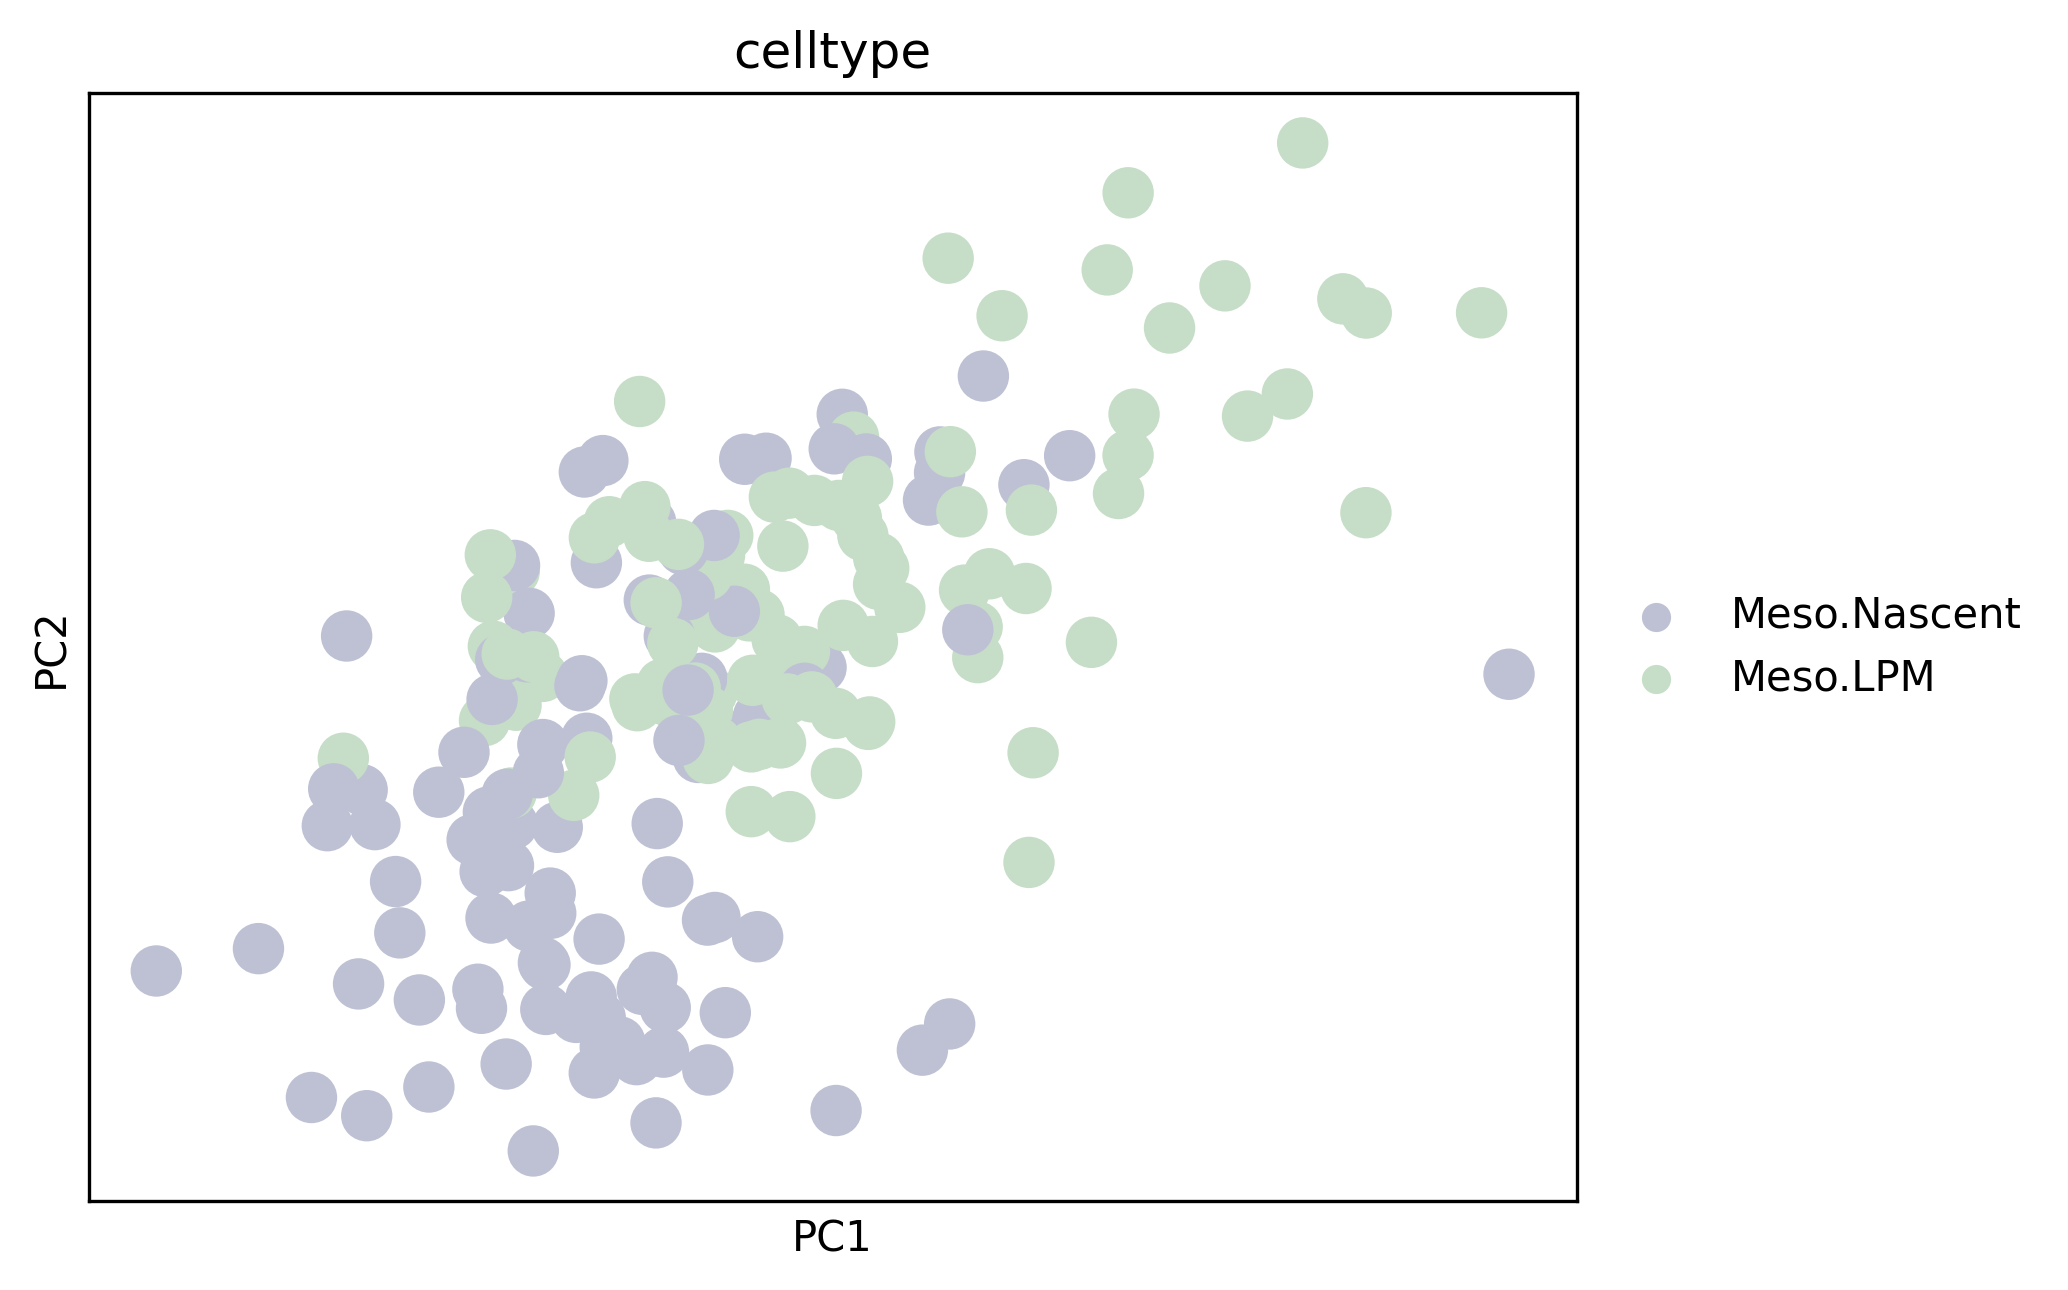

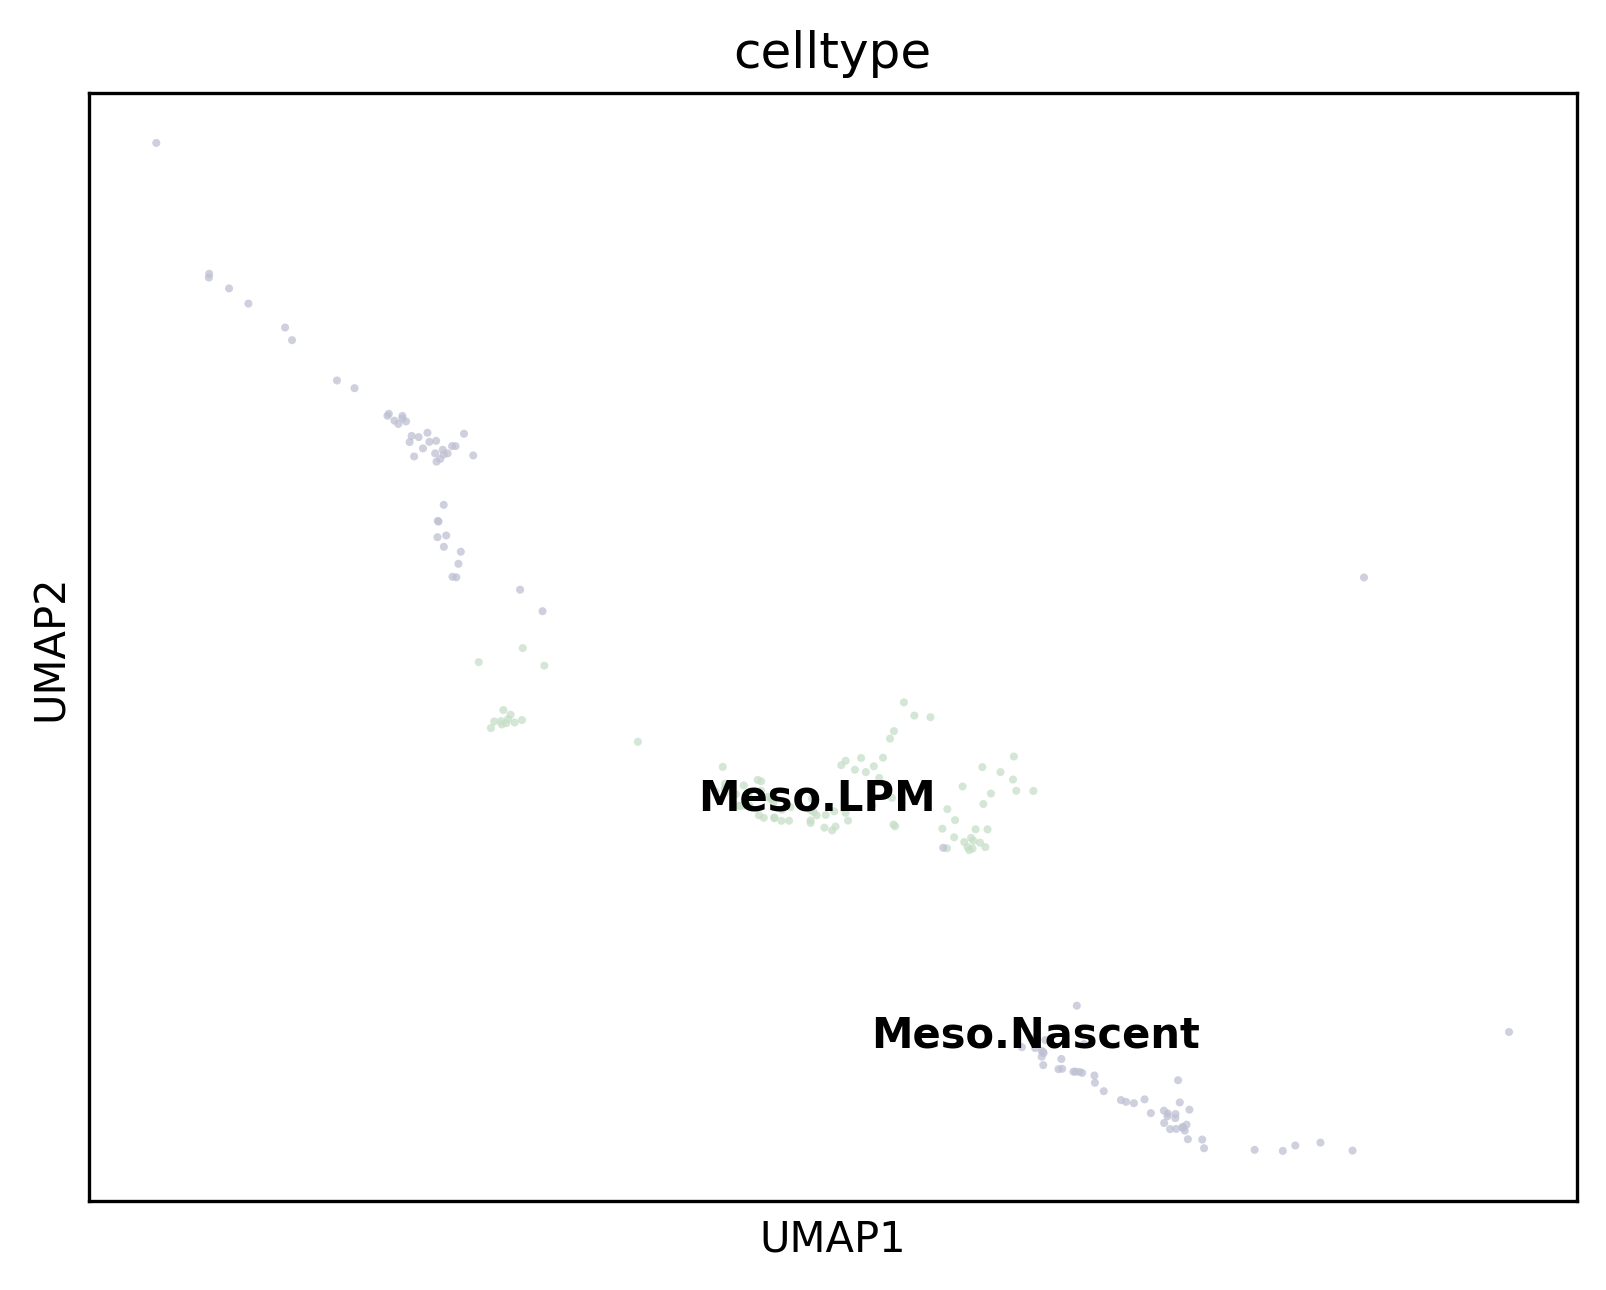

In [ ]:
tokeep = ['Epiblast.PS', 'Meso.Nascent']
adNorm2 = adNorm.copy()
adNorm2 = adNorm2[adNorm2.obs['celltype'].isin(tokeep)].copy()

tokeep = ['Meso.Nascent', 'Meso.LPM']
adNorm3 = adNorm.copy()
adNorm3 = adNorm3[adNorm3.obs['celltype'].isin(tokeep)].copy()

sc.pl.pca(adNorm2, color='celltype')
sc.pl.umap(adNorm2,color=['celltype'], alpha=.75, s=15, legend_loc='on data')

sc.pl.pca(adNorm3, color='celltype')
sc.pl.umap(adNorm3,color=['celltype'], alpha=.75, s=15, legend_loc='on data')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.9/419.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1

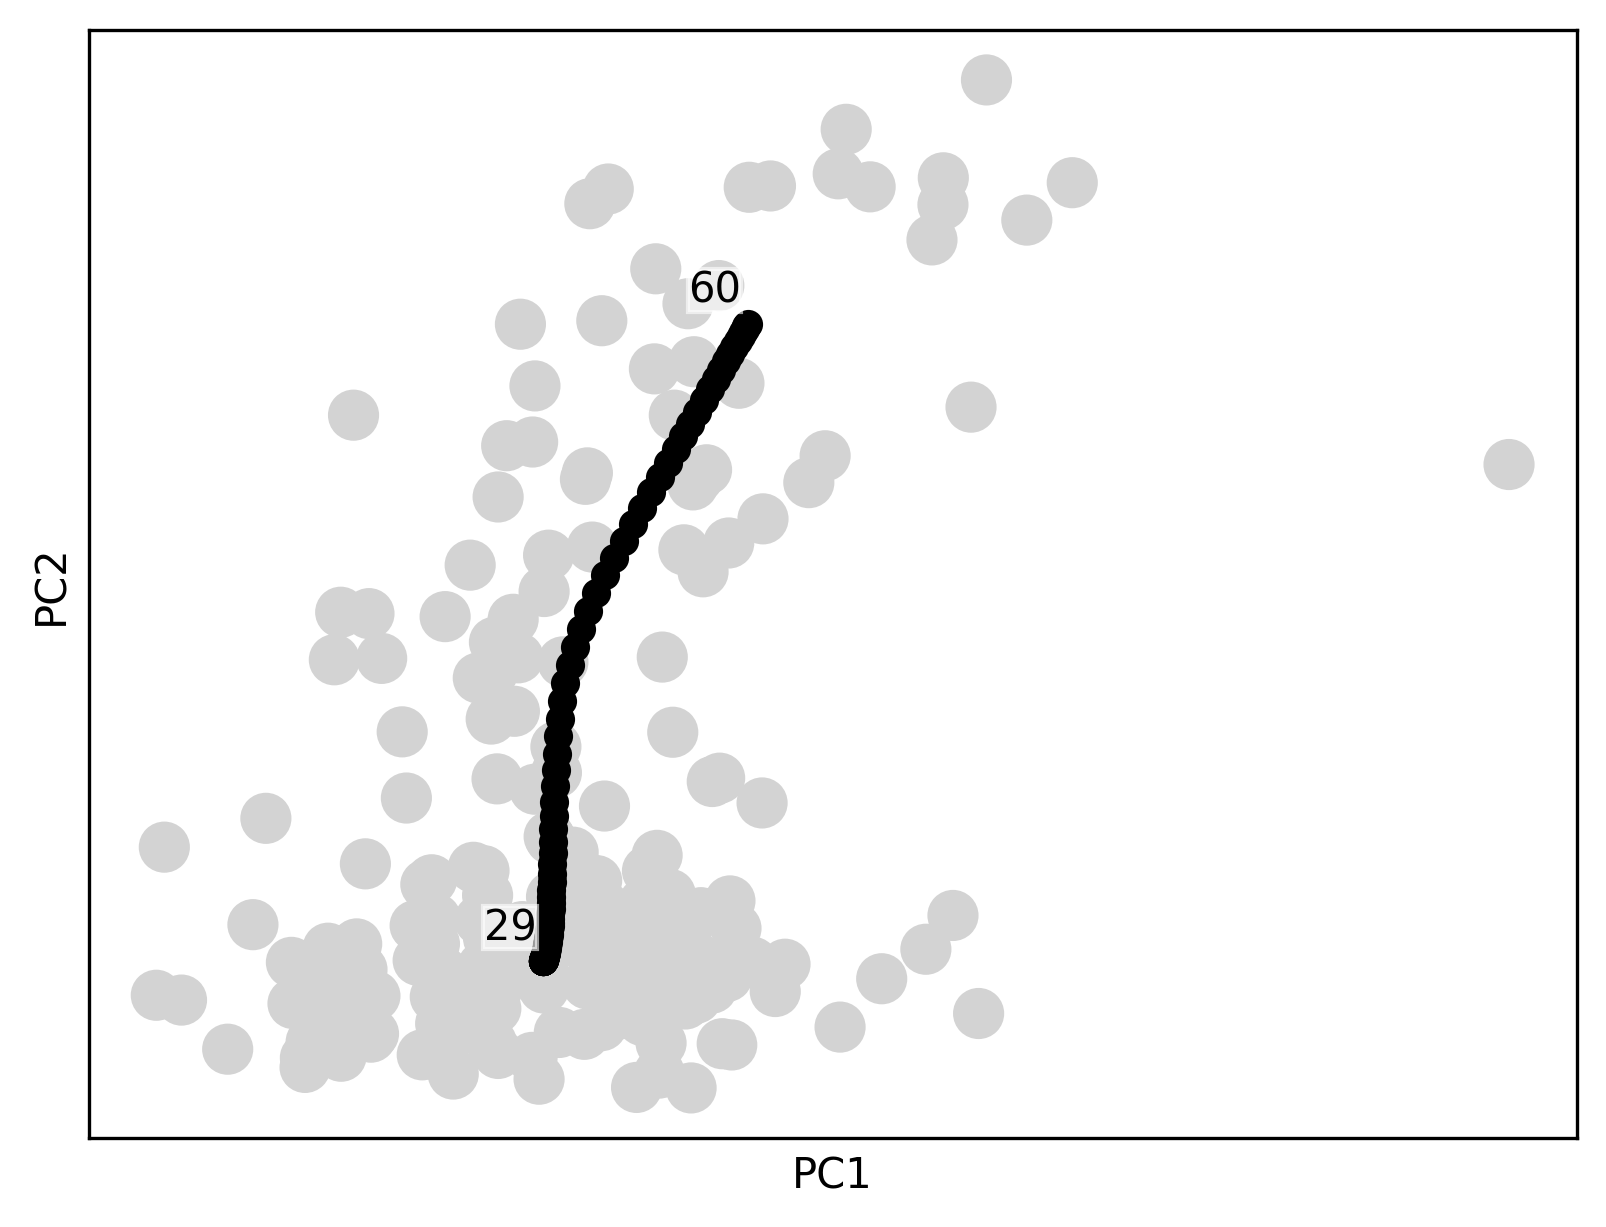

inferring a principal tree --> parameters used 
    100 principal points, sigma = 0.75, lambda = 150, metric = euclidean
    fitting:   0%|          | 0/100 [00:00<?, ?it/s]
    converged
    finished (0:00:00) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.
    graph cleaned --> removed 0 principal points


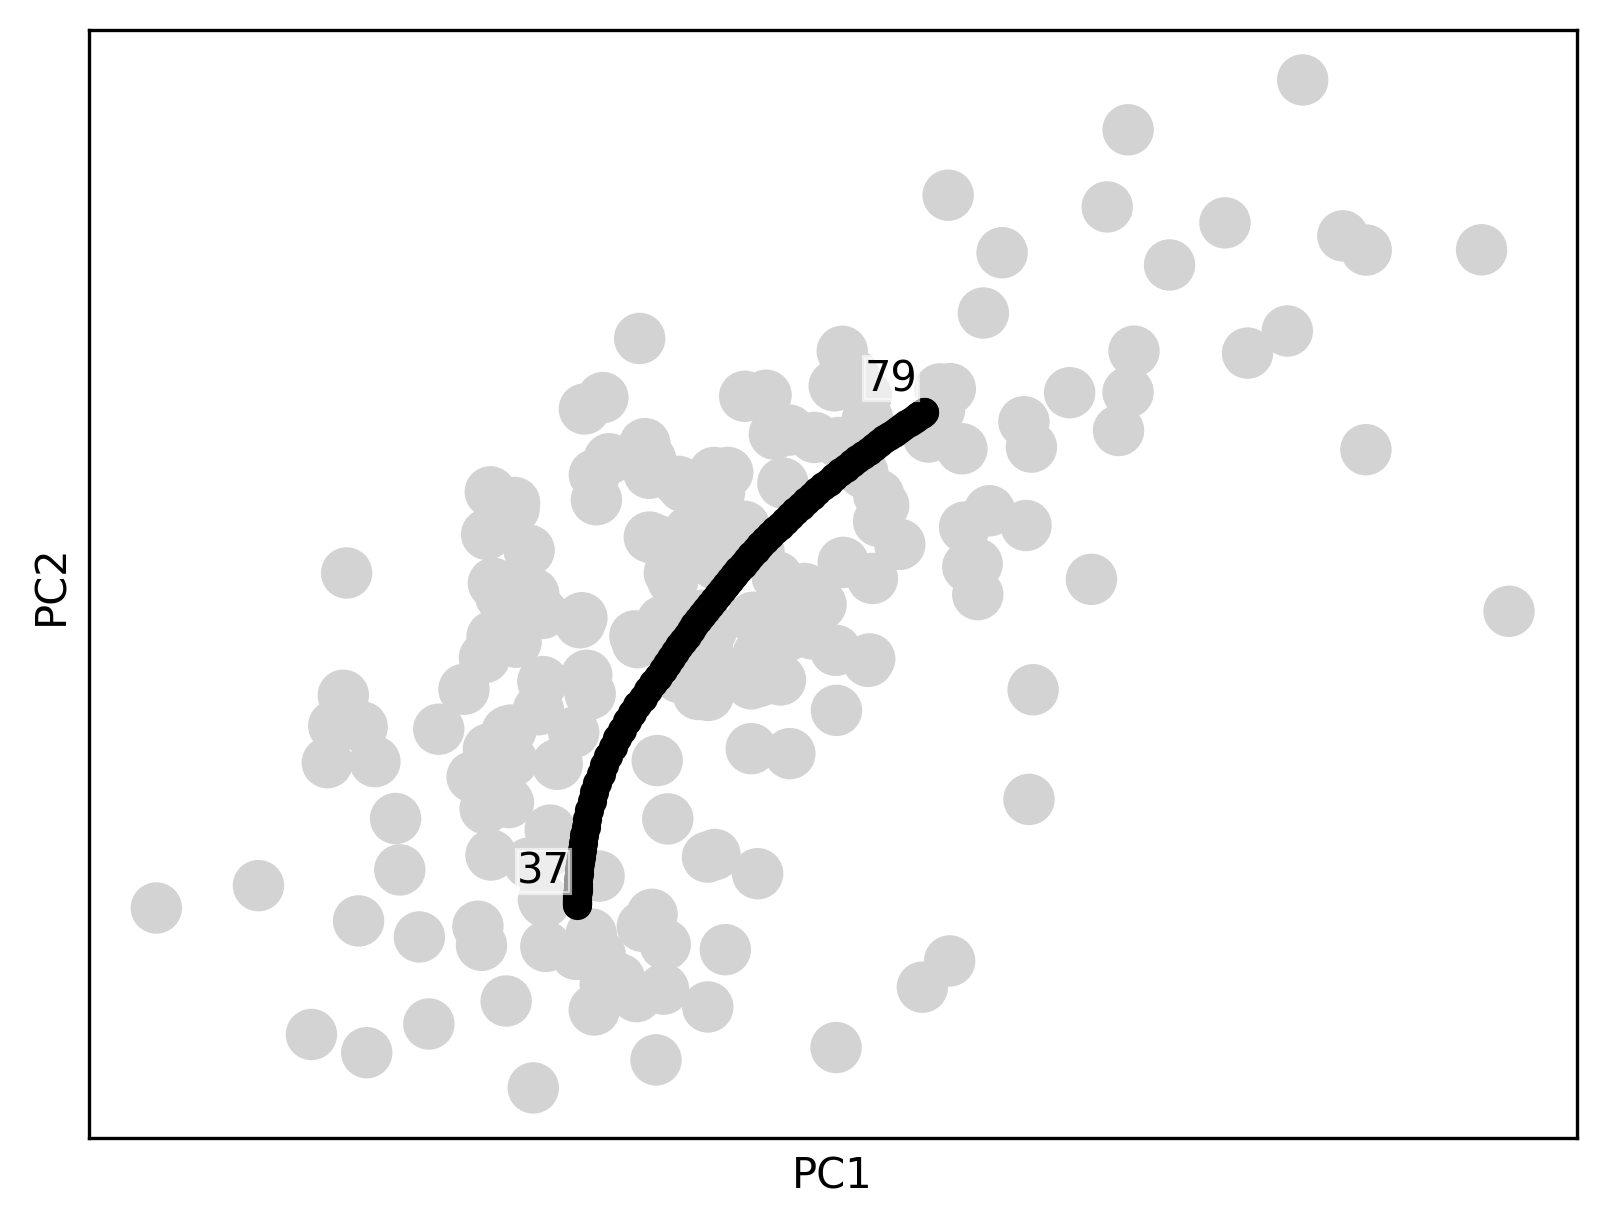

In [ ]:
!pip install --quiet scFates
!pip install --quiet pyslingshot

import scFates as scf

scf.tl.tree(adNorm2, method='ppt', Nodes=100, use_rep='X_pca', ndims_rep=2, ppt_sigma=0.75, ppt_lambda=150, ppt_nsteps=100)
scf.tl.cleanup(adNorm2, minbranchlength=10)
scf.pl.graph(adNorm2, basis='pca')

scf.tl.tree(adNorm3, method='ppt', Nodes=100, use_rep='X_pca', ndims_rep=2, ppt_sigma=0.75, ppt_lambda=150, ppt_nsteps=100)
scf.tl.cleanup(adNorm3, minbranchlength=10)
scf.pl.graph(adNorm3, basis='pca')

node 29 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


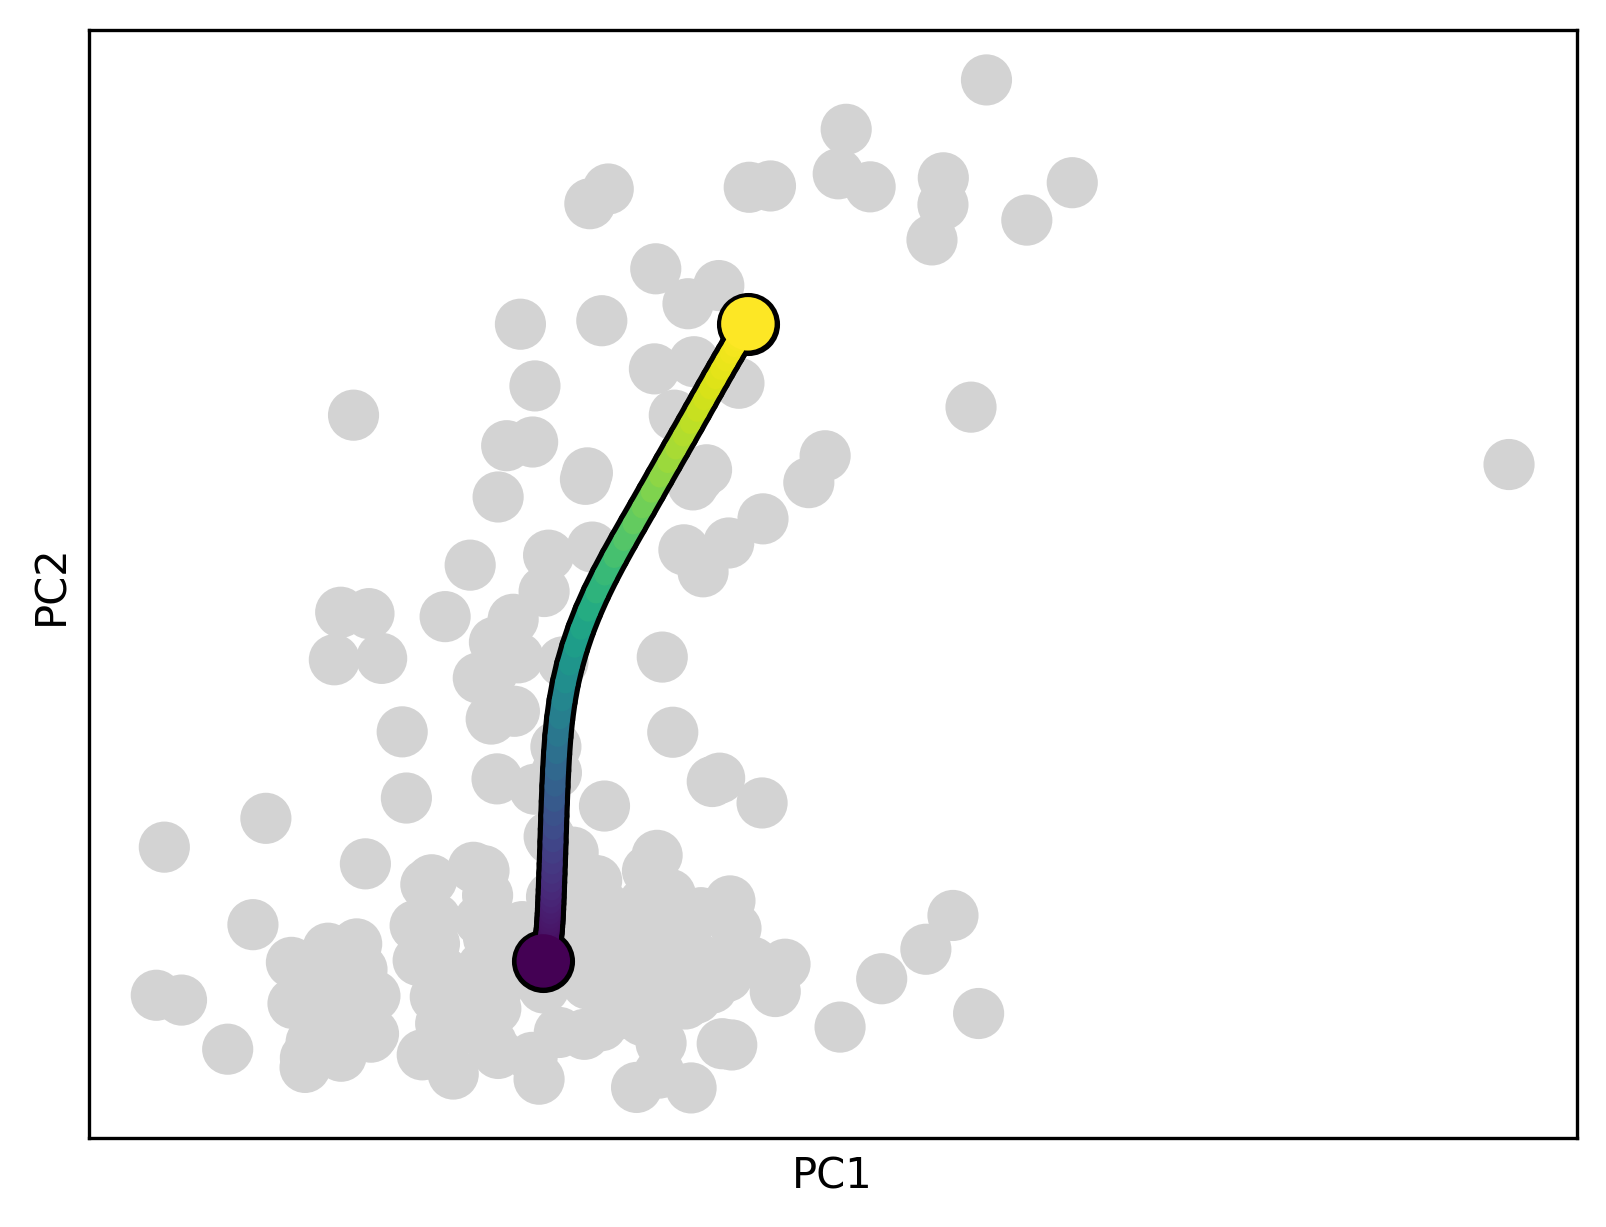

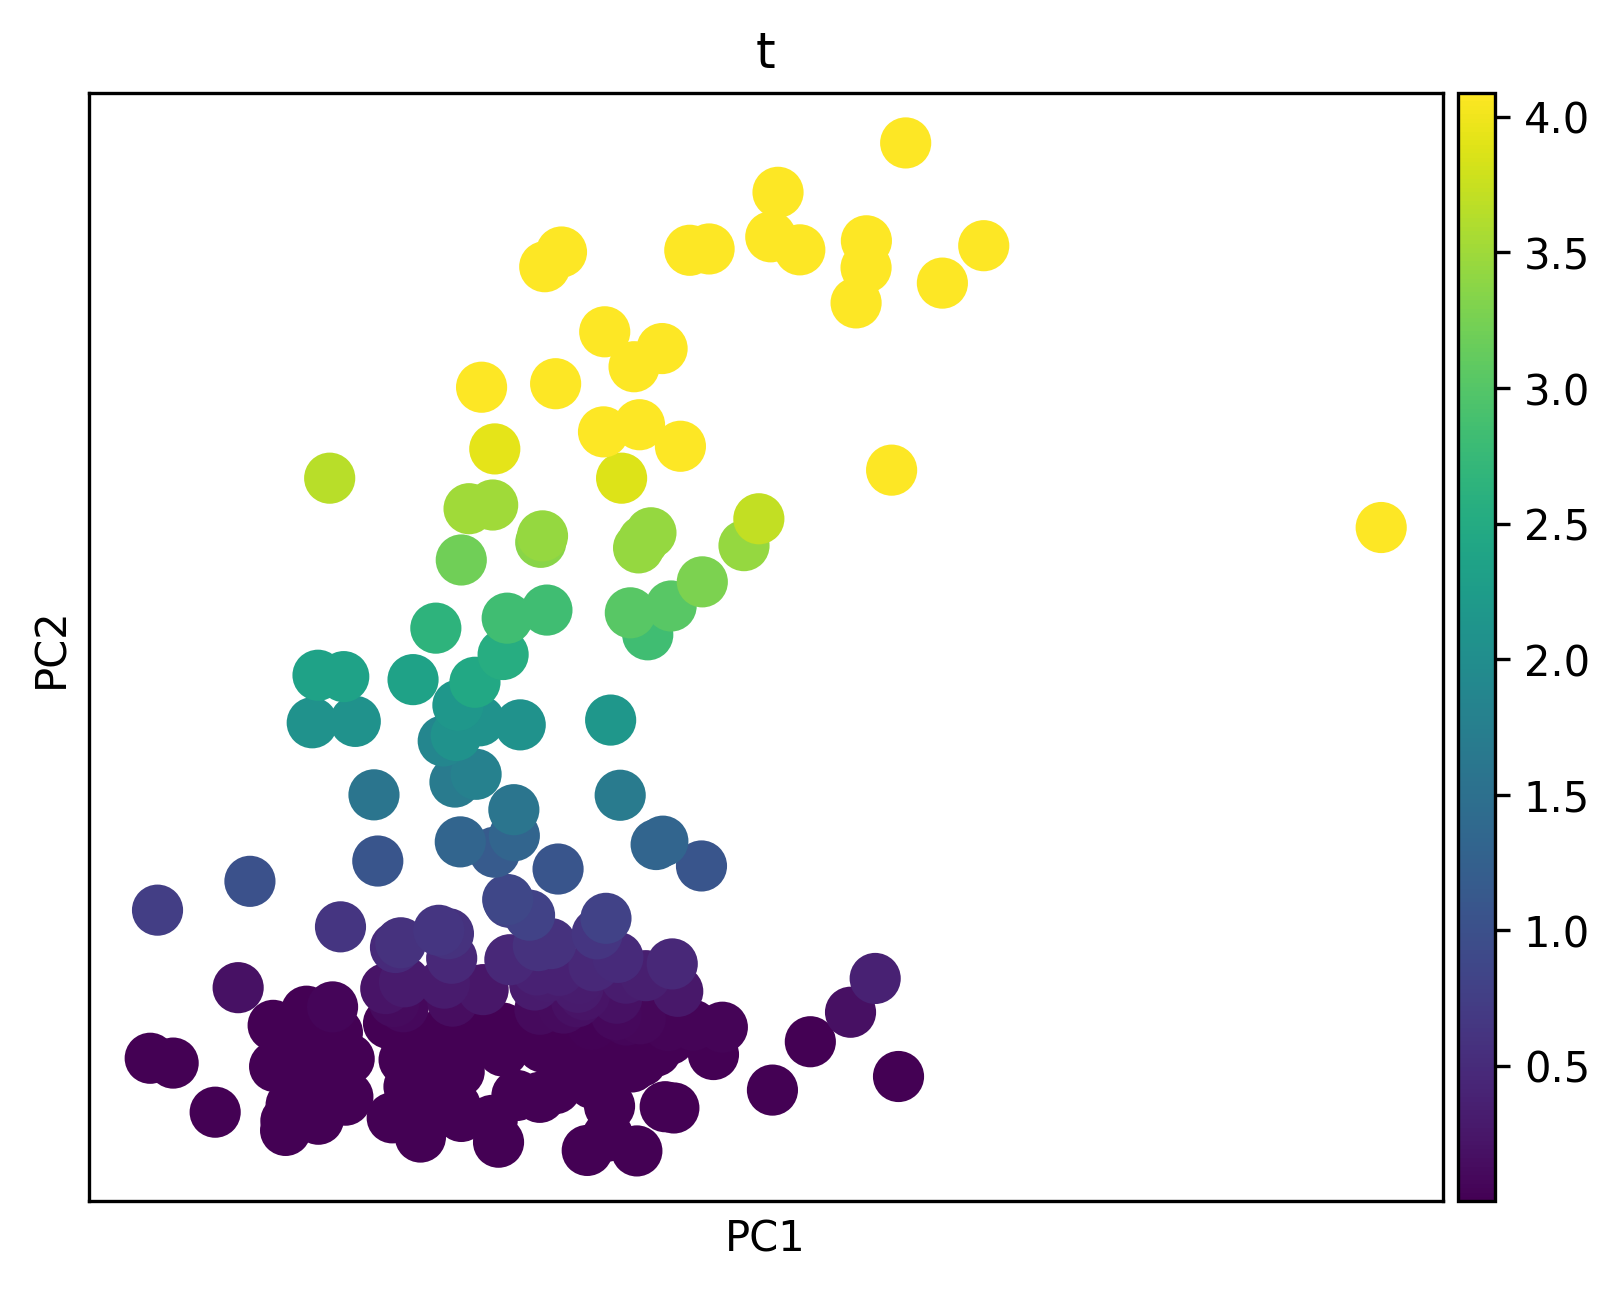

node 37 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


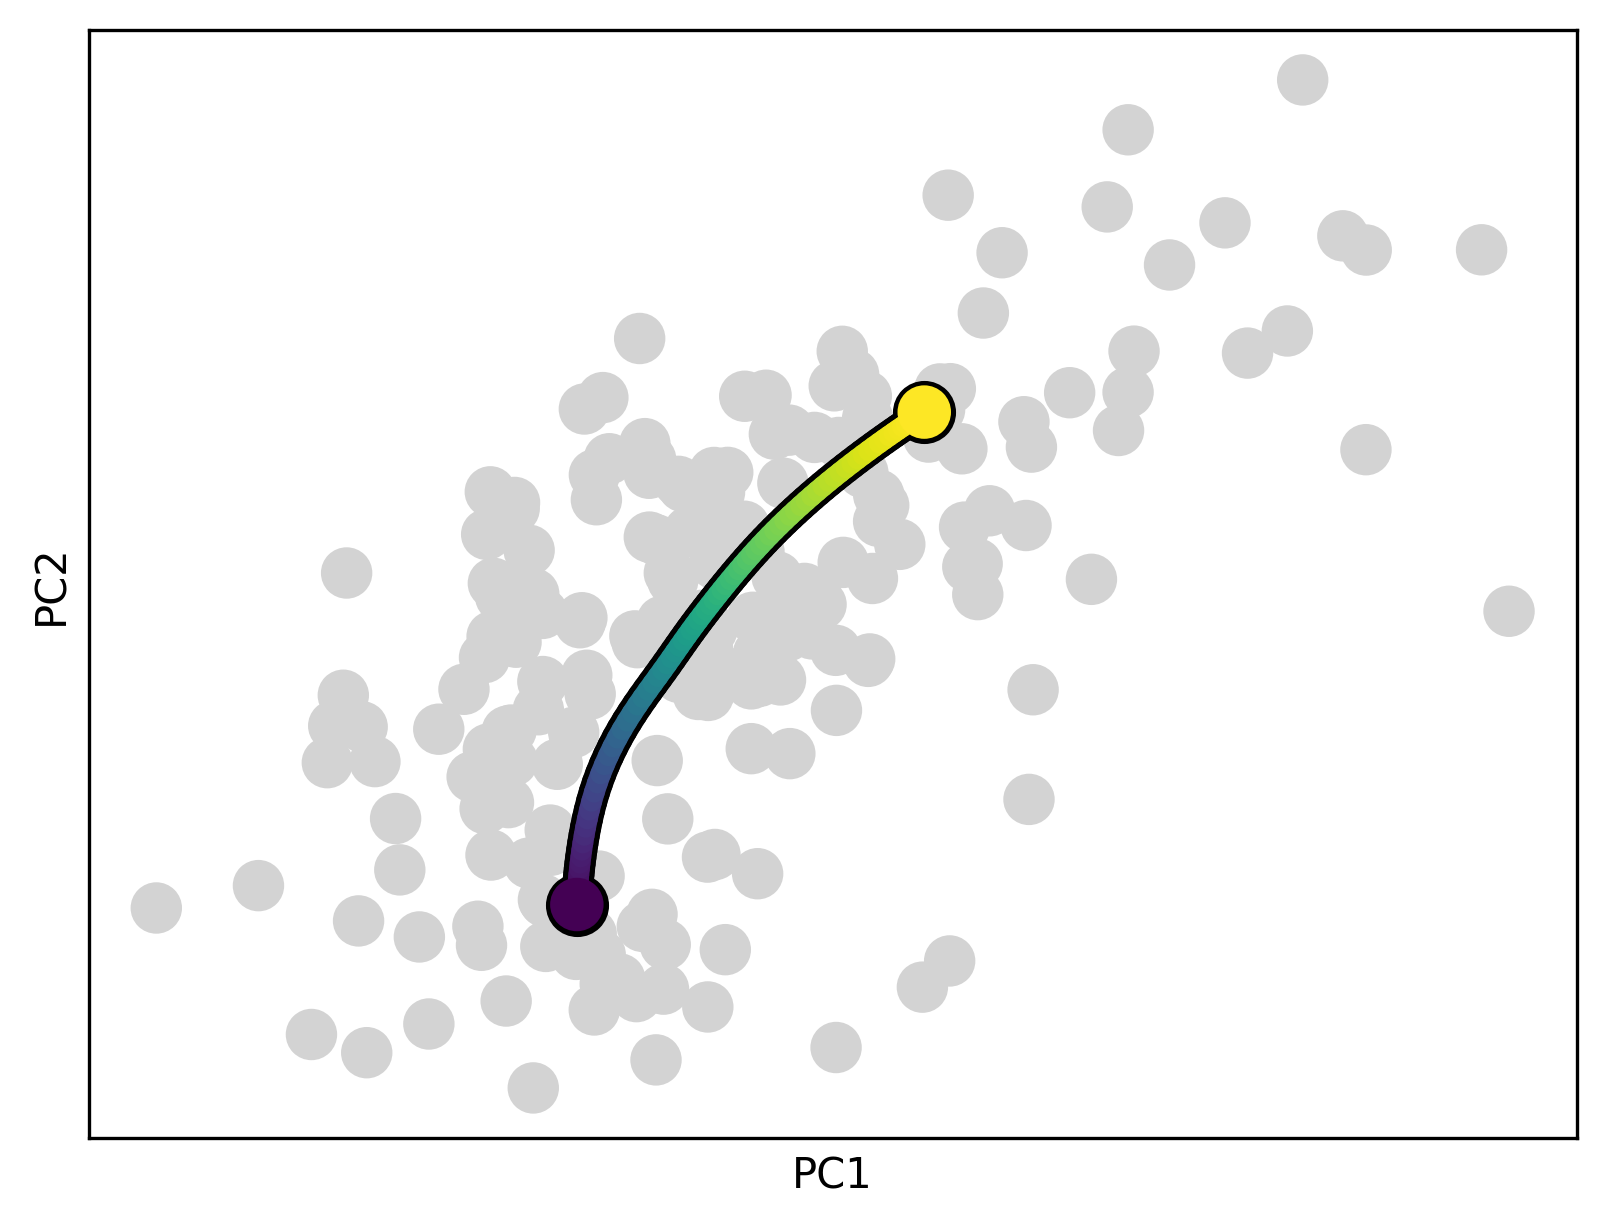

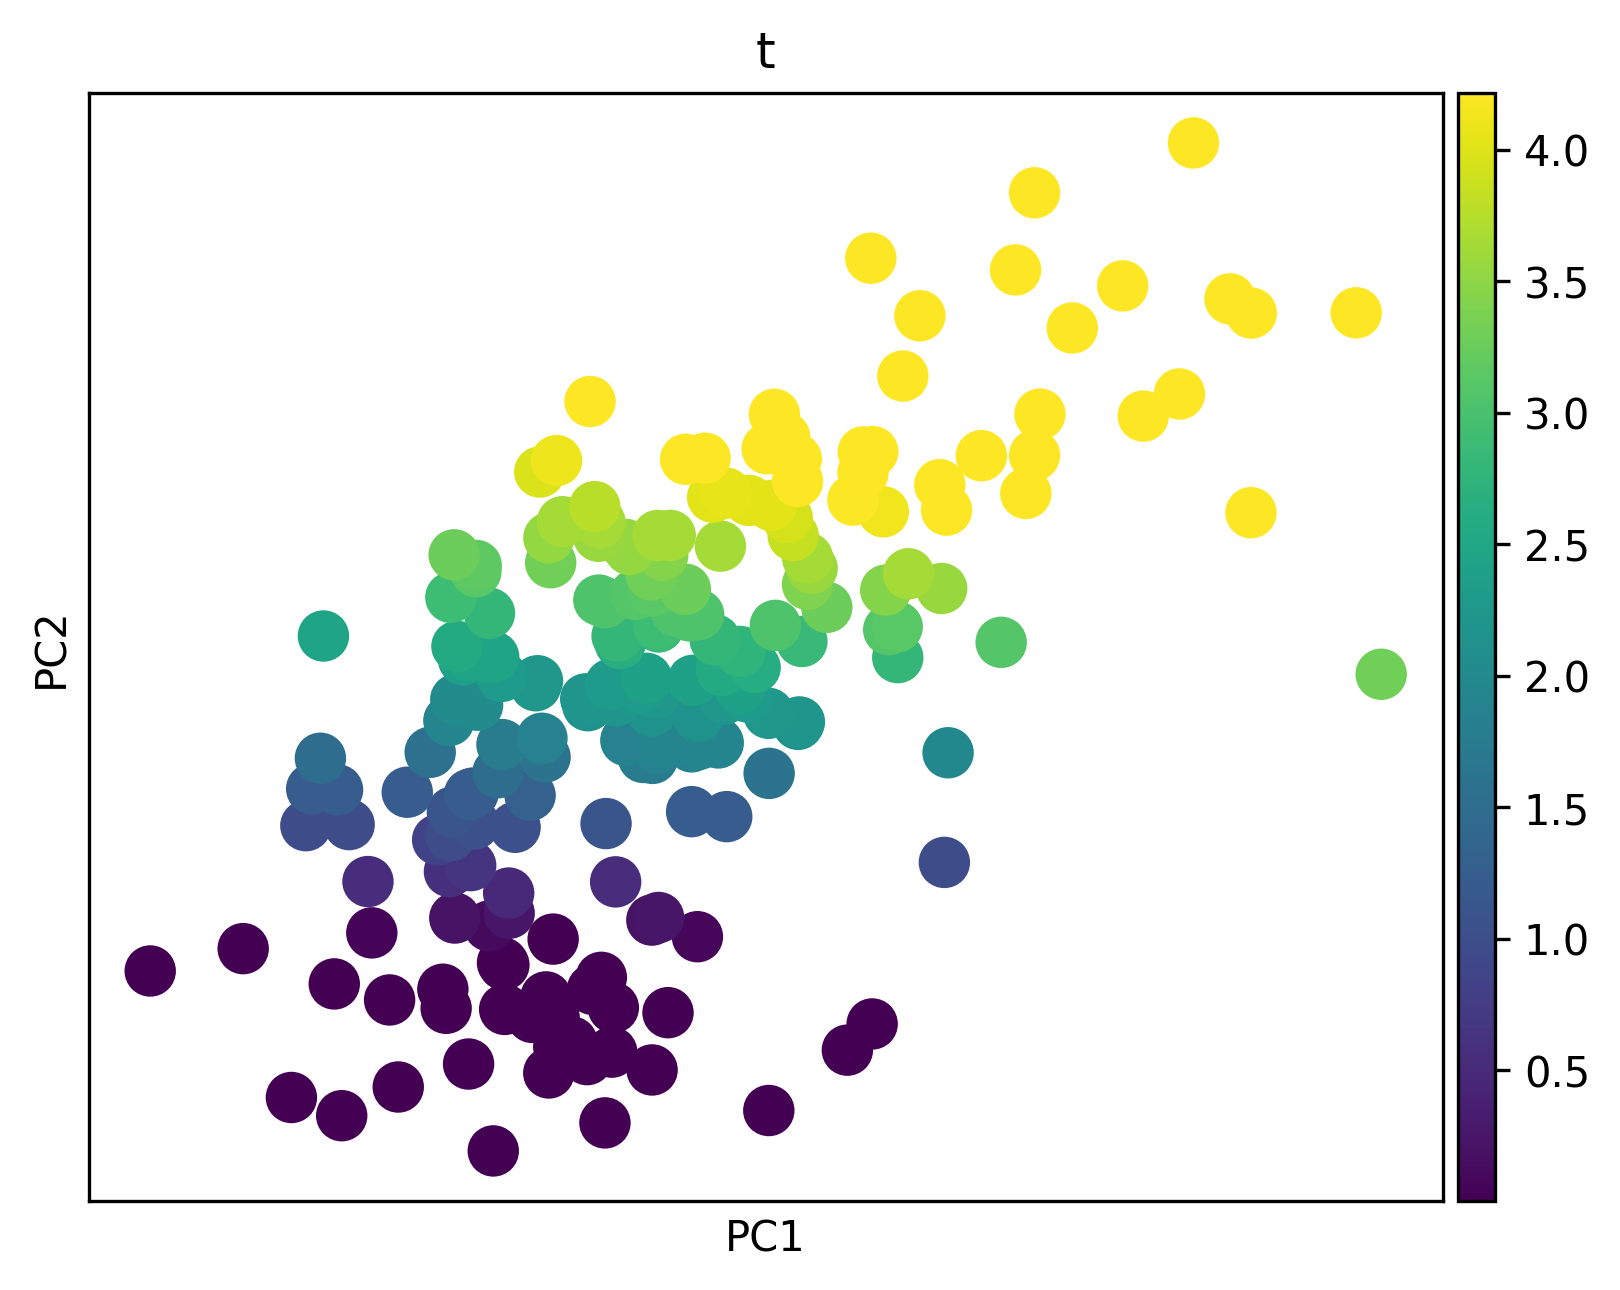

In [ ]:
scf.tl.root(adNorm2, 29)
scf.tl.pseudotime(adNorm2)
scf.pl.trajectory(adNorm2, 'pca')
sc.pl.pca(adNorm2, color='t')

scf.tl.root(adNorm3, 37)
scf.tl.pseudotime(adNorm3)
scf.pl.trajectory(adNorm3, 'pca')
sc.pl.pca(adNorm3, color='t')

In [ ]:
pd.DataFrame.iteritems = pd.DataFrame.items

adFilt1 = adNorm2[:, adNorm2.var.highly_variable].copy()
scf.tl.test_association(adFilt1)

adFilt2 = adNorm3[:, adNorm3.var.highly_variable].copy()
scf.tl.test_association(adFilt2)

test features for association with the trajectory
    single mapping : 100%|██████████| 2359/2359 [06:36<00:00,  5.95it/s]
    found 28 significant features (0:06:36) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.
test features for association with the trajectory
    single mapping : 100%|██████████| 2359/2359 [02:24<00:00, 16.34it/s]
    found 27 significant features (0:02:24) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantl

In [ ]:
scf.tl.fit(adFilt1)
scf.tl.fit(adFilt2)

fit features associated with the trajectory
    single mapping : 100%|██████████| 28/28 [00:01<00:00, 19.96it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:01) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.
fit features associated with the trajectory
    single mapping : 100%|██████████| 27/27 [00:01<00:00, 20.51it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:01) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [ ]:
scf.tl.cluster(adFilt1, n_pcs=5)
scf.tl.cluster(adFilt2, n_pcs=5)

Clustering features using fitted layer
    finished (0:00:01) --> added 
    .var['clusters'] identified modules.
Clustering features using fitted layer
    finished (0:00:00) --> added 
    .var['clusters'] identified modules.


Index(['Utf1', 'Pim2', 'Trh', 'Epcam', 'Dnmt3b', 'Igfbp2', 'Ldhb', 'Bex4',
       'Bex1', 'Pou5f1', 'Fgf8', 'Snrpn', 'Lefty2', 'Mesp1', 'Myl7', 'Ifitm1',
       'Bambi', 'Hmga2', 'Slc25a4', 'Phlda2', 'Hand1', 'Ccnd2', 'S100a10',
       'Ppic', 'Etv2', 'Krt8', 'Krt18', 'Mest'],
      dtype='object')

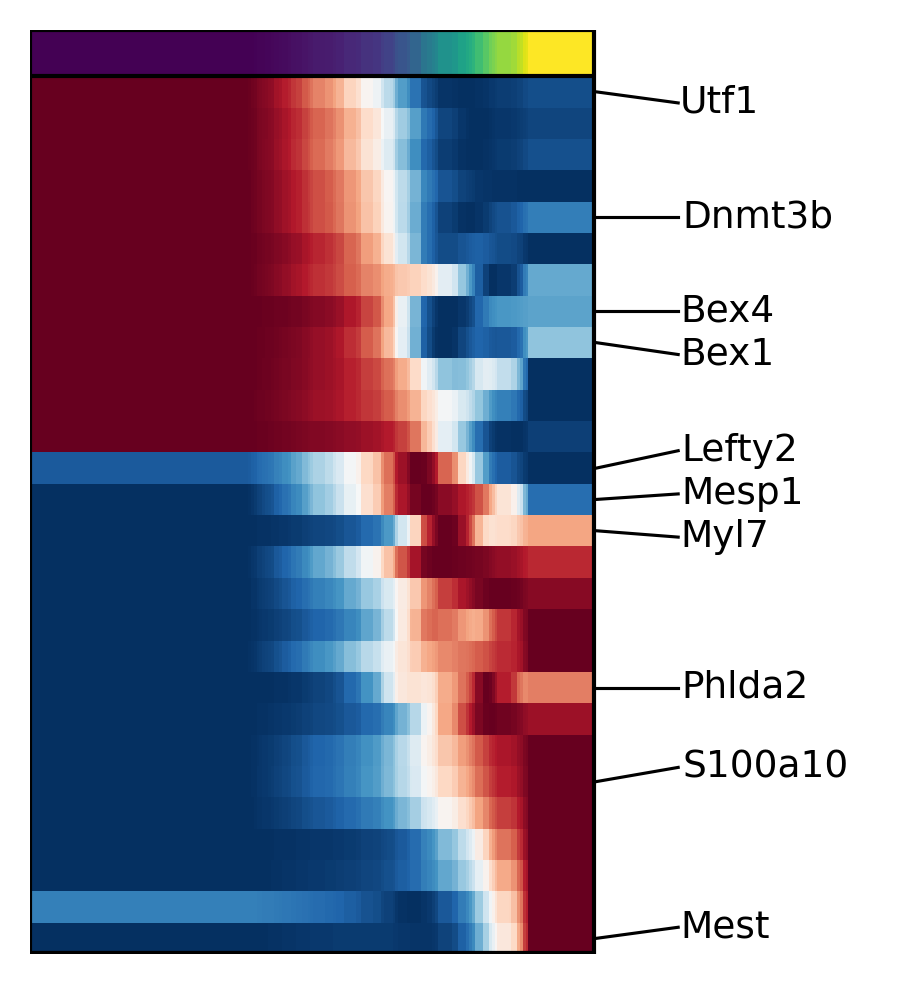

In [ ]:
scf.pl.trends(adFilt1, root_milestone="29", milestones=["60"], plot_emb = False, ordering = "max", return_genes = True)

Index(['Dnmt3b', 'Mixl1', 'Fgf8', 'Cyp26a1', 'T', 'Snrpn', 'Pou5f1', 'Eomes',
       'Tdgf1', 'Lefty2', 'Mesp1', 'Emb', 'Cited1', 'Phlda2', 'Hand1',
       'Crabp1', 'Hoxaas3', 'Mdk', 'Foxf1', 'Csrp2', 'H19', 'Id2', 'Mest',
       'Meg3', 'Bex1', 'Krt18', 'Krt8'],
      dtype='object')

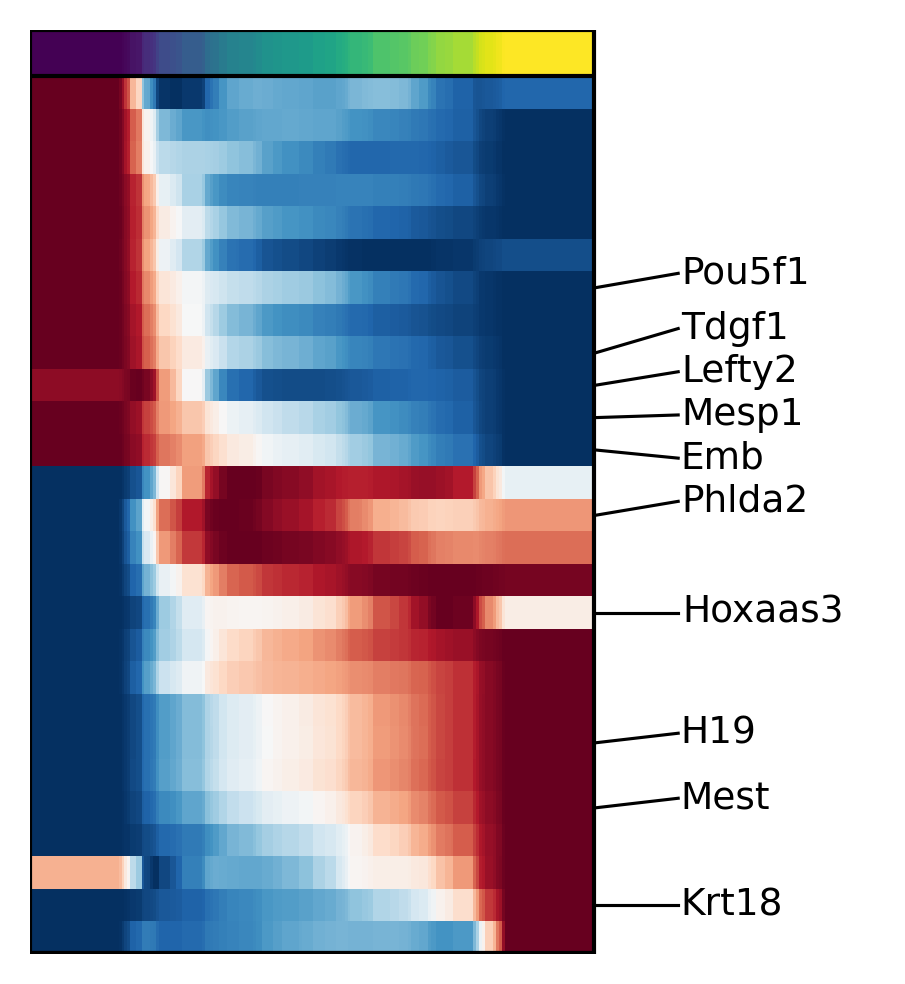

In [ ]:
scf.pl.trends(adFilt2, root_milestone="37", milestones=["79"], plot_emb = False, ordering = "max", return_genes = True)


In [ ]:
with open('allTFs_mm_aertslab_011924.txt', 'r') as file:
    contents = file.read()

TFs = contents.split('\n')

adGRN1 = adFilt1[:, adFilt1.var_names.isin(TFs)]
adGRN2 = adFilt2[:, adFilt2.var_names.isin(TFs)]

In [ ]:
!pip install --quiet git+https://github.com/pcahan1/oneSC.git@cscb24
!pip install --quiet git+https://github.com/pcahan1/PySingleCellNet/

import numpy as np
import pandas as pd
import pySingleCellNet as pySCN
import onesc
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scanpy as sc
import anndata
import scipy as sp
from joblib import dump, load
import sys
import igraph as ig
from igraph import Graph
ig.config['plotting.backend'] = 'matplotlib'

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 8.3 MB/s eta 0:00:00


29 : 
144
60 : 
55


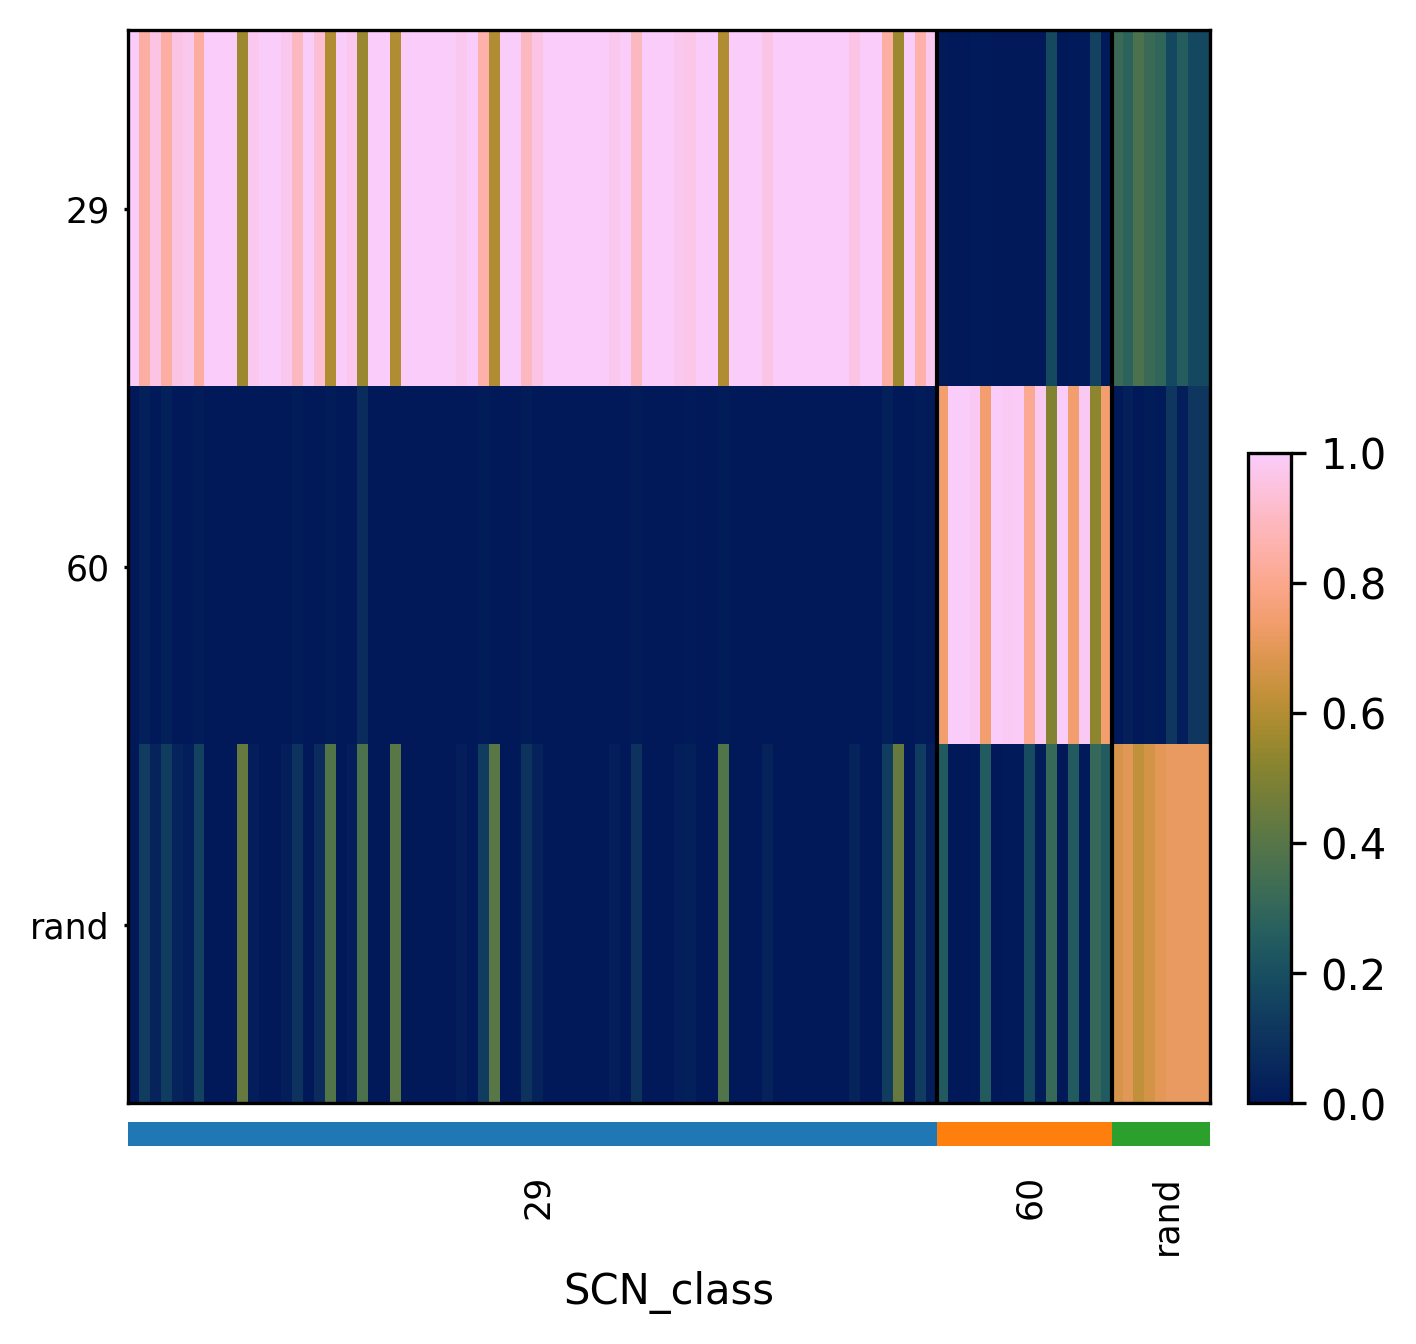

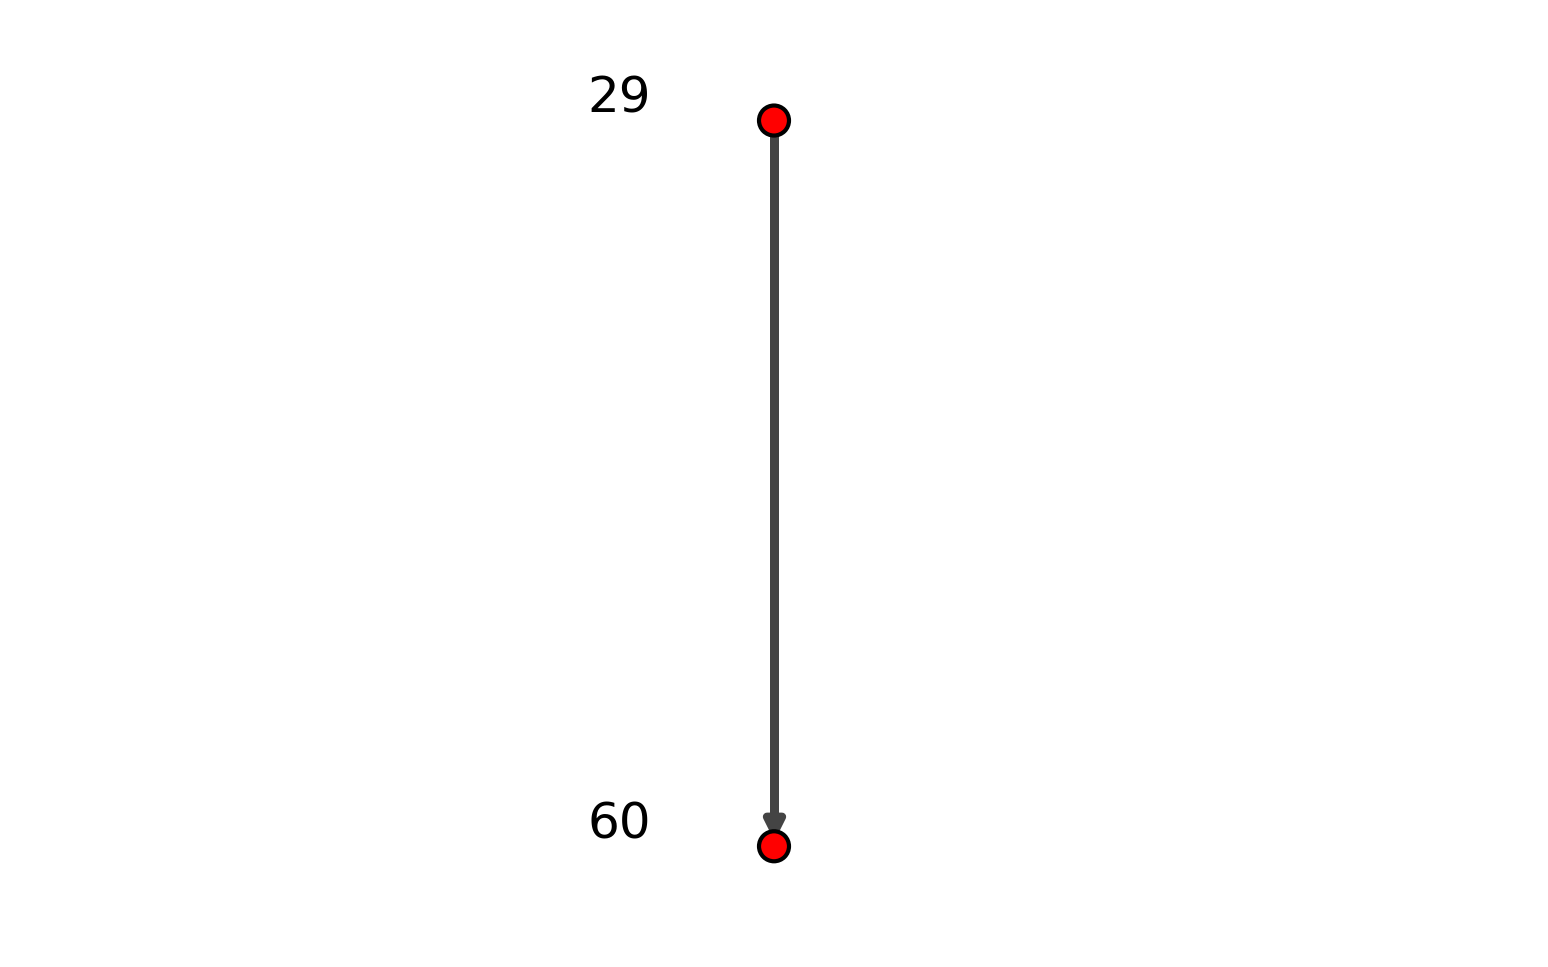

Preparing states and data for GA ...
Starting network reconstruction with GA ...
GRN reconstruction complete.


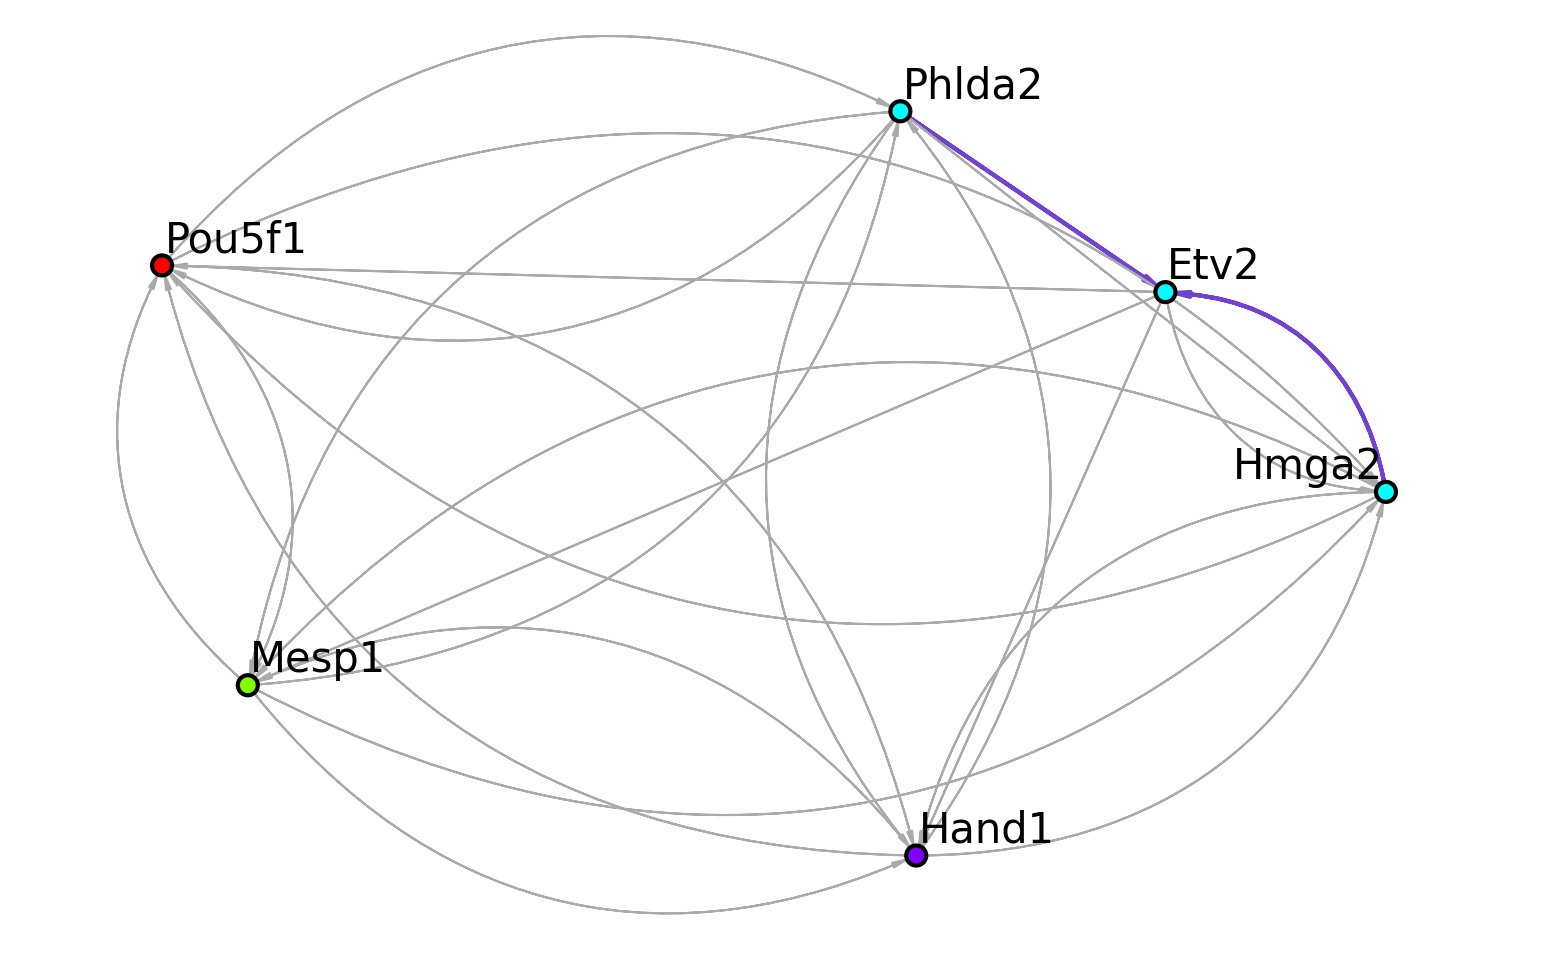

In [ ]:
adTrain_rank, adHeldOut_rank = pySCN.splitCommonAnnData(adGRN1, ncells=50, dLevel='milestones')
clf = pySCN.train_rank_classifier(adTrain_rank, dLevel='milestones', nRand=100)

pySCN.rank_classify(adHeldOut_rank, clf)
pySCN.heatmap_scores(adHeldOut_rank, groupby='SCN_class')

initial_clusters = ['29']
end_clusters = ['60']

state_path = onesc.construct_cluster_graph_adata(adGRN1, initial_clusters = initial_clusters, terminal_clusters = end_clusters, cluster_col = "milestones", pseudo_col = "t")

onesc.plot_state_graph(state_path)

start_end_states = {'start': ['29'], 'end':['60']}

iGRN = onesc.infer_grn(state_path, start_end_states, adGRN1, num_generations = 20, sol_per_pop = 30, reduce_auto_reg=True, ideal_edges = 0, GA_seed_list = [1, 3], init_pop_seed_list = [21, 25], cluster_col='milestones', pseudoTime_col='t')

grn_ig = onesc.dataframe_to_igraph(iGRN)
onesc.plot_grn(grn_ig, layout_method='fr',community_first=True)

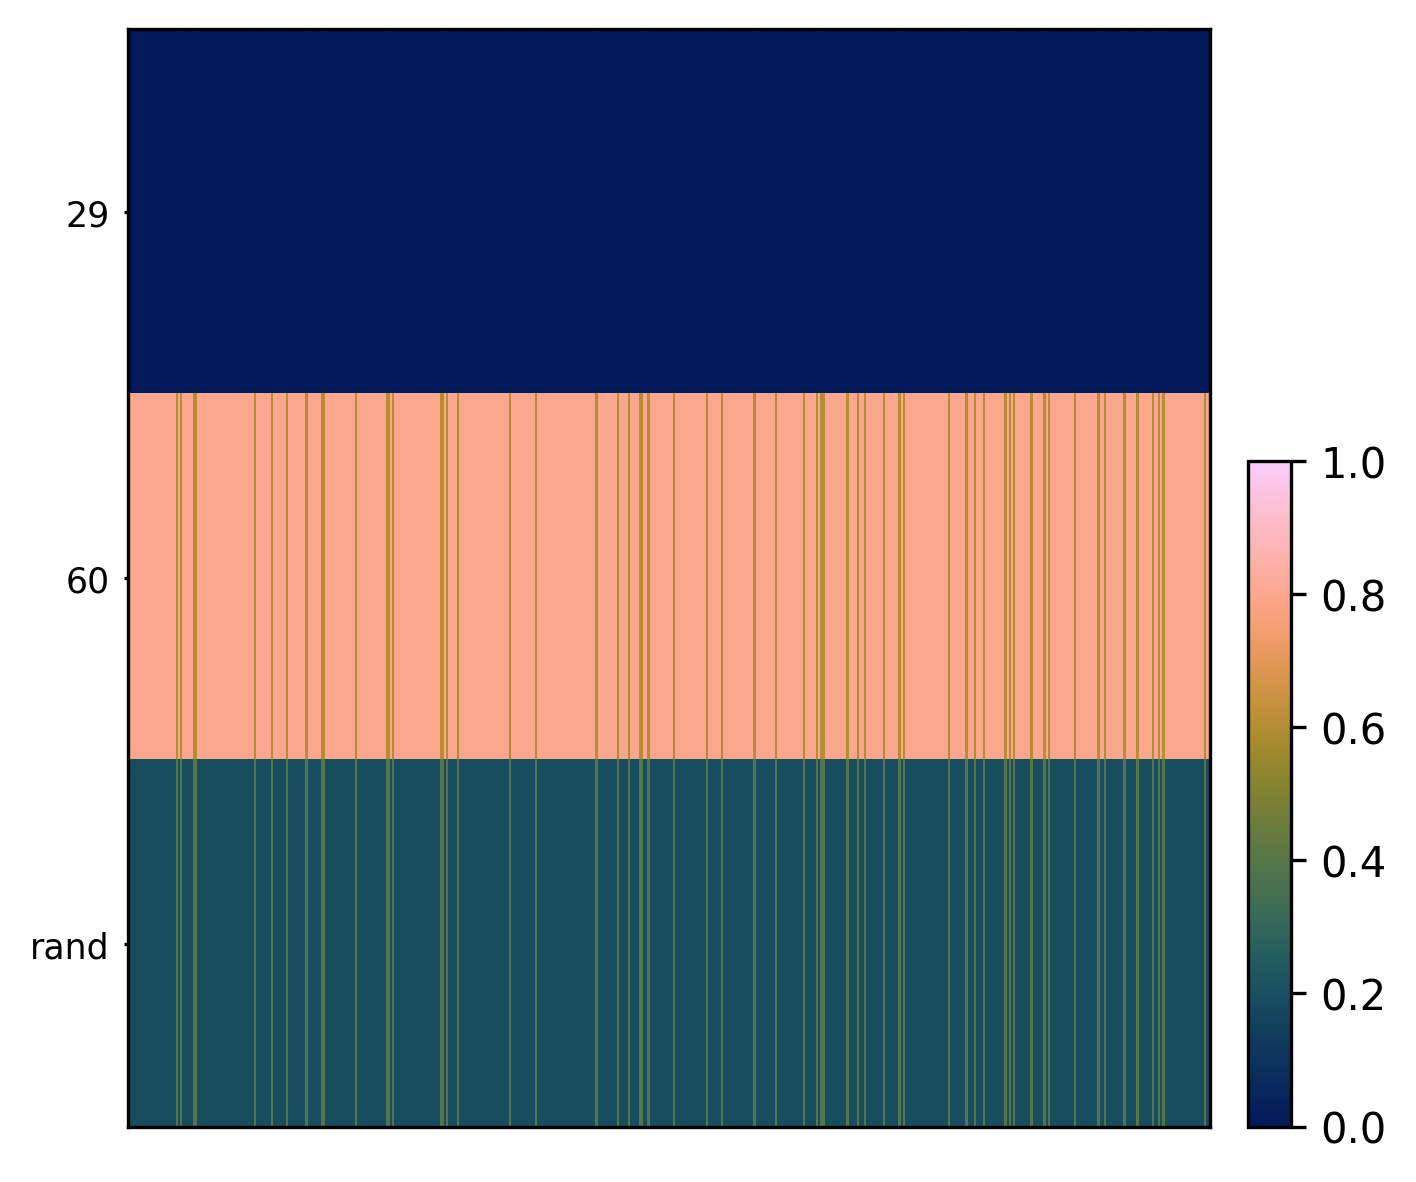

In [ ]:
adSim = adGRN1[adGRN1.obs['milestones'] == '29'].copy()
xstates = onesc.define_states_adata(adSim, min_mean = 0.05, min_percent_cells = 0.20) * 2

netname = 'diff'
netsim = onesc.network_structure()
netsim.fit_grn(iGRN)
sim = onesc.OneSC_simulator()
sim.add_network_compilation(netname, netsim)

perturb_dict = dict()
perturb_dict['Phlda2'] = 2
simlist_ko = onesc.simulate_parallel_adata(sim, xstates, 'diff', perturb_dict = perturb_dict, n_cores = 8, num_sim = 1000, t_interval = 0.1, noise_amp = 0.5)

ad_ko = onesc.sample_and_compile_anndatas(simlist_ko, X=50, time_bin=(80, 100), sequential_order_column='sim_time')
pySCN.rank_classify(ad_ko, clf)
pySCN.heatmap_scores(ad_ko, groupby = 'SCN_class')

79 : 
116
37 : 
81


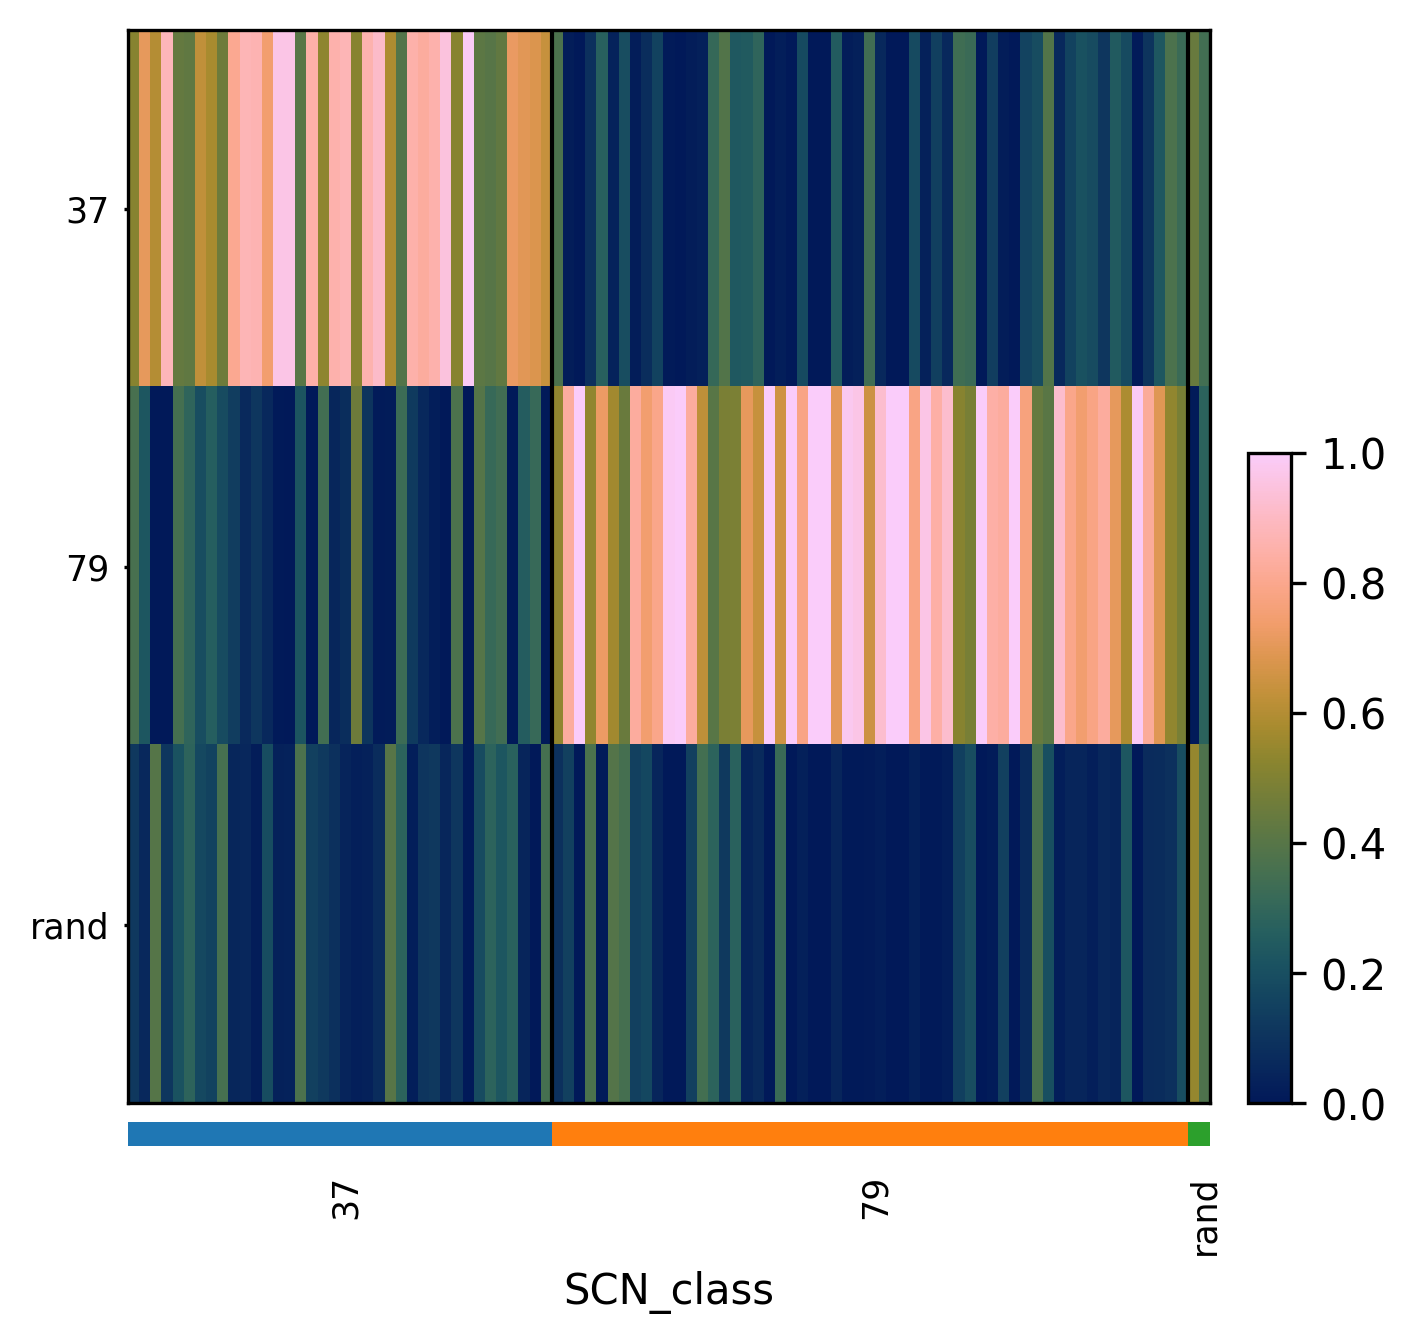

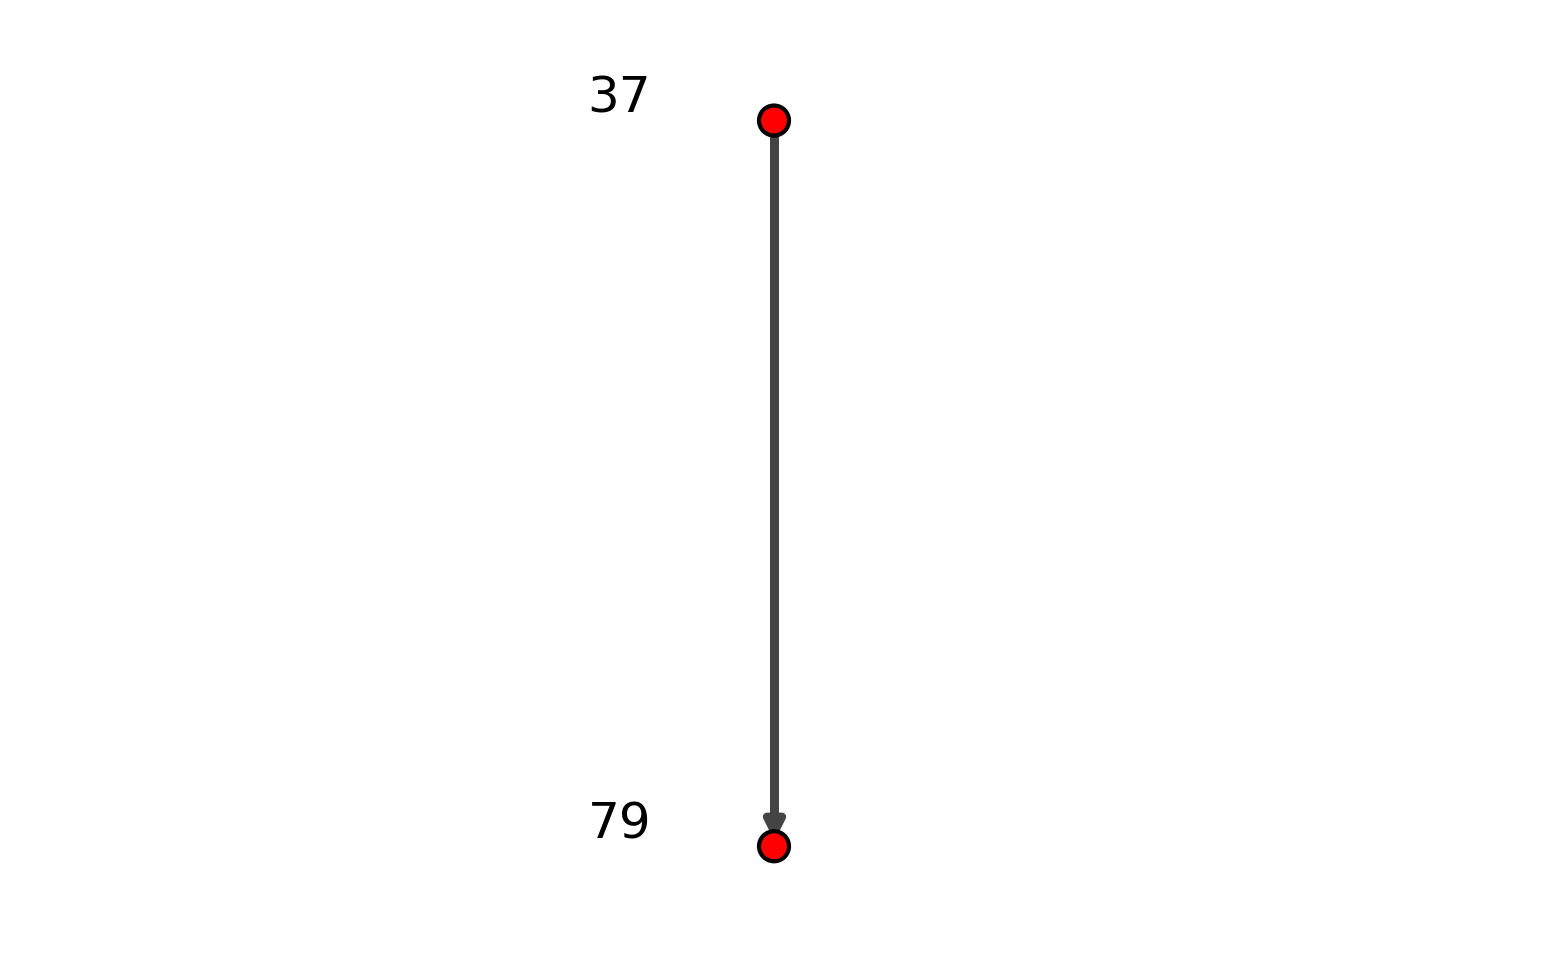

Preparing states and data for GA ...
Starting network reconstruction with GA ...
GRN reconstruction complete.


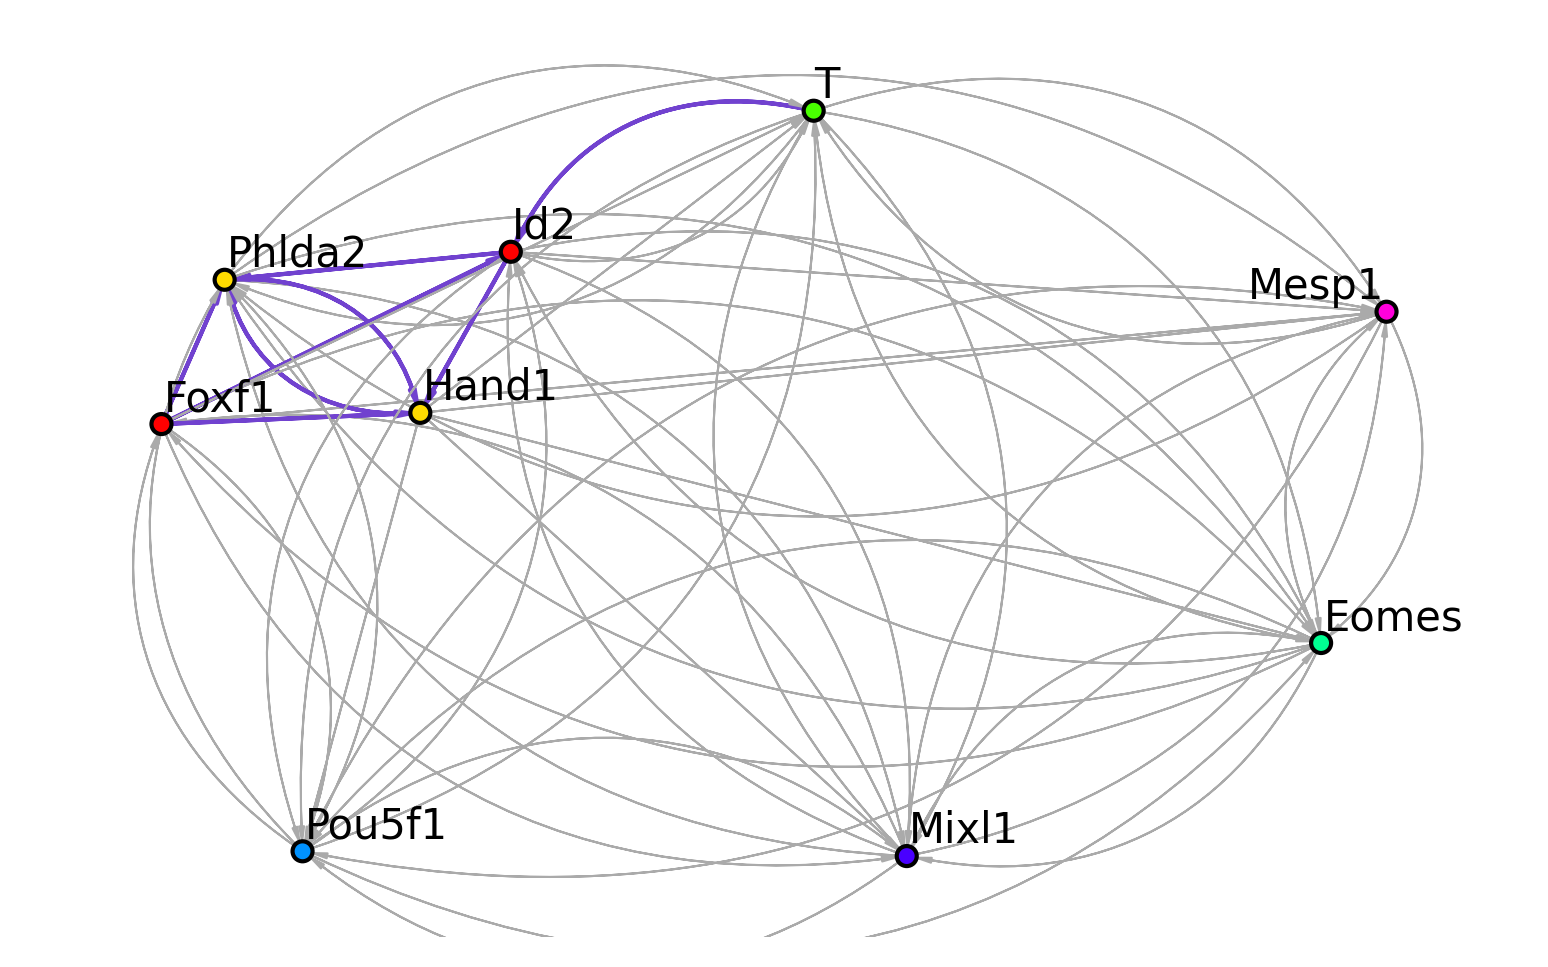

In [ ]:
adTrain_rank, adHeldOut_rank = pySCN.splitCommonAnnData(adGRN2, ncells=50, dLevel='milestones')
clf = pySCN.train_rank_classifier(adTrain_rank, dLevel='milestones', nRand=100)

pySCN.rank_classify(adHeldOut_rank, clf)
pySCN.heatmap_scores(adHeldOut_rank, groupby='SCN_class')

initial_clusters = ['37']
end_clusters = ['79']

state_path = onesc.construct_cluster_graph_adata(adGRN2, initial_clusters = initial_clusters, terminal_clusters = end_clusters, cluster_col = "milestones", pseudo_col = "t")

onesc.plot_state_graph(state_path)

start_end_states = {'start': ['37'], 'end':['79']}

iGRN = onesc.infer_grn(state_path, start_end_states, adGRN2, num_generations = 20, sol_per_pop = 30, reduce_auto_reg=True, ideal_edges = 0, GA_seed_list = [1, 3], init_pop_seed_list = [21, 25], cluster_col='milestones', pseudoTime_col='t')

grn_ig = onesc.dataframe_to_igraph(iGRN)
onesc.plot_grn(grn_ig, layout_method='fr',community_first=True)

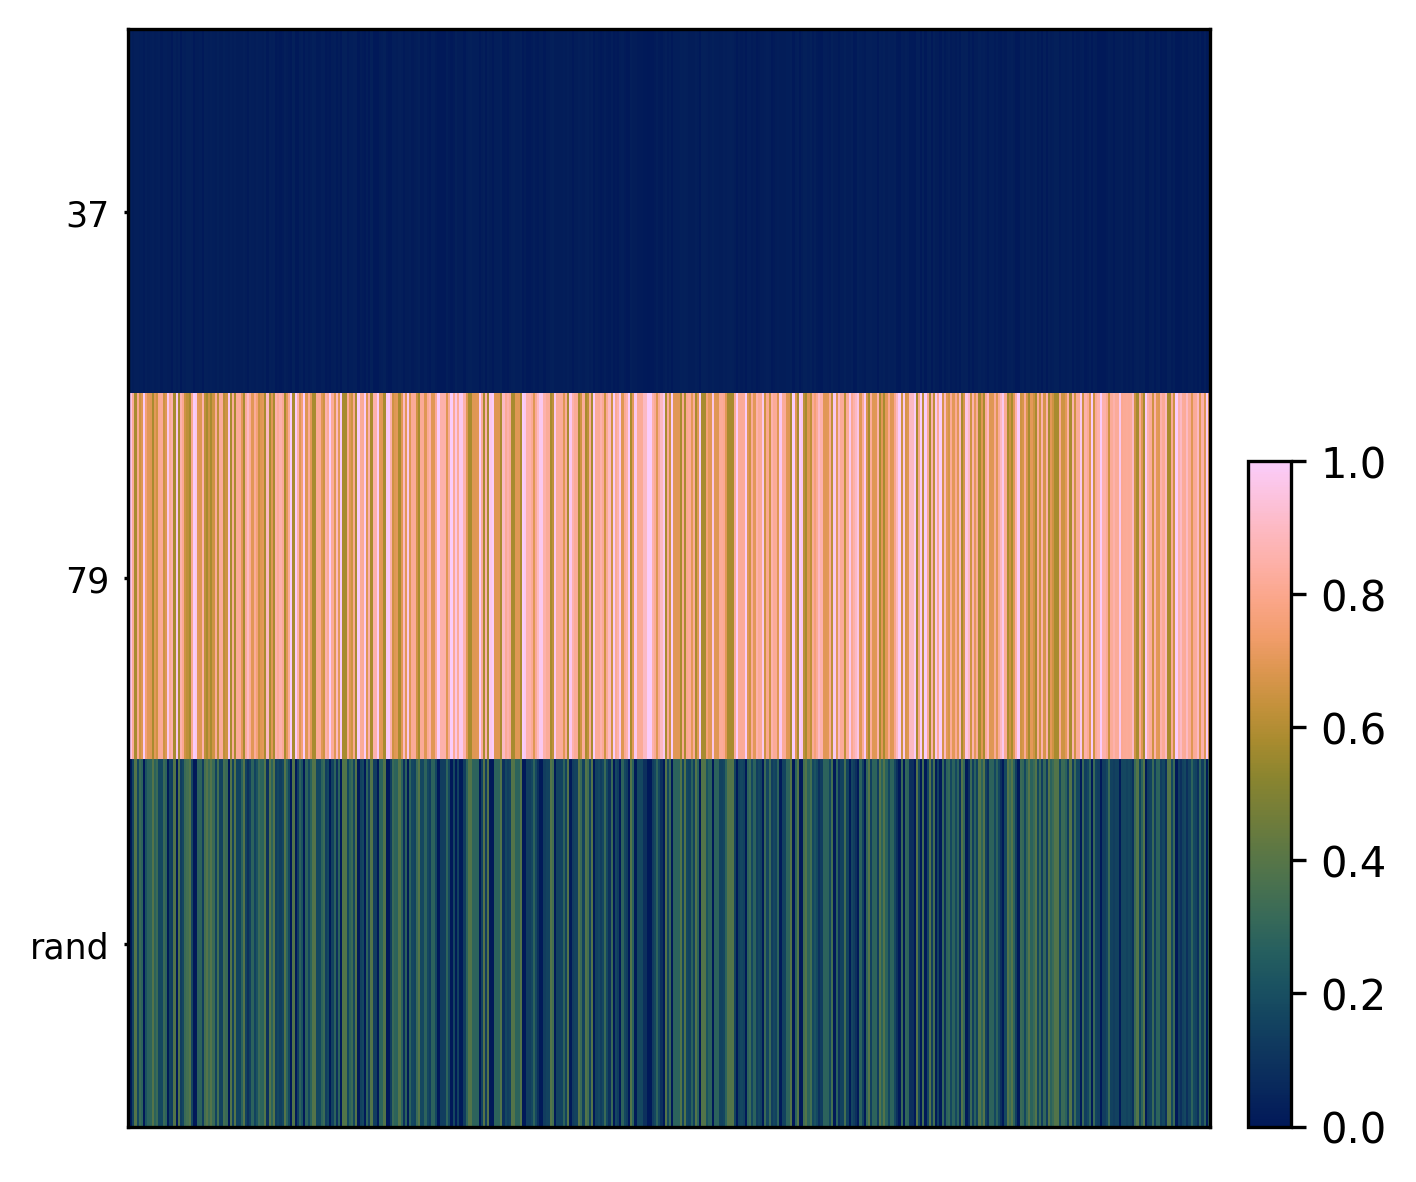

In [ ]:
adSim = adGRN2[adGRN2.obs['milestones'] == '37'].copy()
xstates = onesc.define_states_adata(adSim, min_mean = 0.05, min_percent_cells = 0.20) * 2

netname = 'diff'
netsim = onesc.network_structure()
netsim.fit_grn(iGRN)
sim = onesc.OneSC_simulator()
sim.add_network_compilation(netname, netsim)

perturb_dict = dict()
perturb_dict['Foxf1'] = 2
simlist_ko = onesc.simulate_parallel_adata(sim, xstates, 'diff', perturb_dict = perturb_dict, n_cores = 8, num_sim = 1000, t_interval = 0.1, noise_amp = 0.5)

ad_ko = onesc.sample_and_compile_anndatas(simlist_ko, X=50, time_bin=(80, 100), sequential_order_column='sim_time')
pySCN.rank_classify(ad_ko, clf)
pySCN.heatmap_scores(ad_ko, groupby = 'SCN_class')

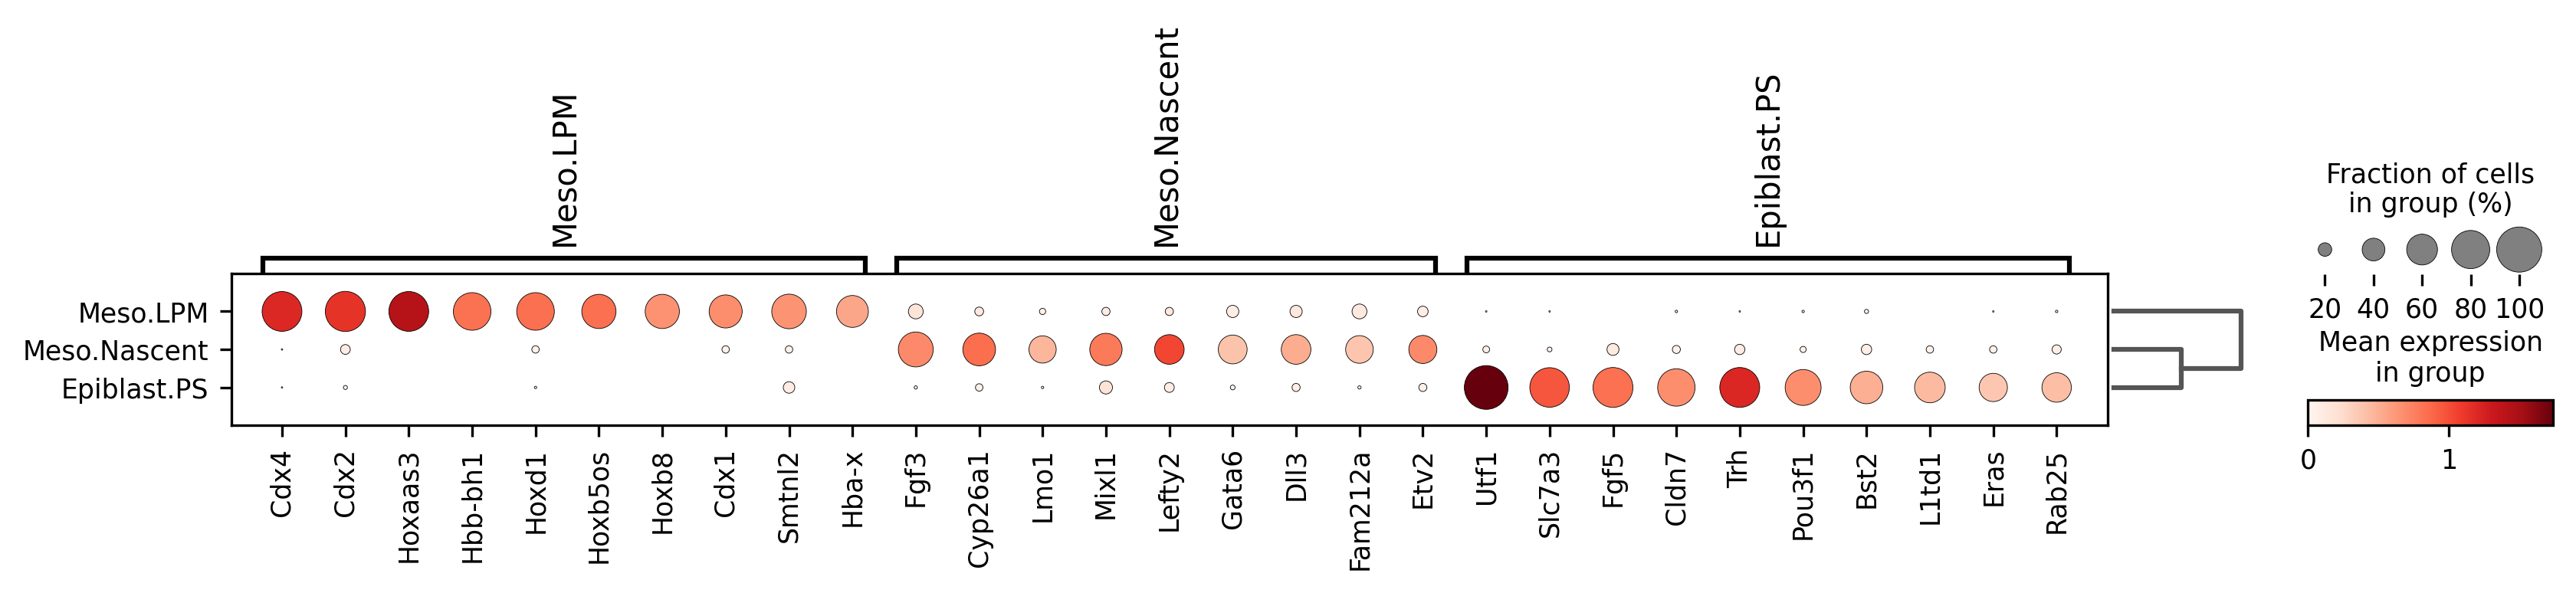

In [ ]:
tokeep = ['Epiblast.PS', 'Meso.Nascent', 'Meso.LPM']
adNorm4 = adNorm.copy()
adNorm4 = adNorm4[adNorm4.obs['celltype'].isin(tokeep)].copy()

sc.tl.rank_genes_groups(adNorm4, use_raw=False, groupby="celltype")
sc.tl.filter_rank_genes_groups(adNorm4, min_fold_change=.7, min_in_group_fraction=.5, max_out_group_fraction=.15)
sc.pl.rank_genes_groups_dotplot(adNorm4, n_genes=10, groupby="celltype", dendrogram=True, key='rank_genes_groups_filtered')